<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## K-Means Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository.They can be skipped if data is available locally.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


## K-Means Clustering

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset
df_clustering = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [ ]:
#Show dataset
df_clustering.head()

state  latitude  longitude  avg_age_participants    datetime  \
0     Indiana   39.8322   -86.2492                  19.0  2015-05-02   
1    Michigan   42.4190   -83.0393                  37.0  2016-11-05   
2    Missouri   38.9647   -94.4654                  29.0  2016-12-21   
3  California   34.3904  -117.3770                  19.0  2018-01-06   
4    Illinois   41.8895   -87.7507                  36.0  2016-07-08   

   males_ratio state_congressional_district  povertyPercentage  killed_ratio  \
0          1.0                    indiana_7               12.3      0.000000   
1          1.0                  michigan_14               11.0      0.000000   
2          1.0                   missouri_5               11.9      0.000000   
3          1.0                 california_8               11.0      1.000000   
4          1.0                   illinois_7               10.9      0.333333   

   injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0       1.000000             0.0                 0.547323   
1       0.500000             0.5                 0.785066   
2       0.000000             0.0                 0.588294   
3       0.000000             0.0                -0.599672   
4       0.666667             0.0                 0.842395   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.009259               0.000000                0.030303   
1              0.032258               0.000000                0.041667   
2              0.013699               0.000000                0.000000   
3              0.047619               0.200000                0.000000   
4              0.006637               0.016393                0.005450   

   unharmed_in_month_ratio  
0                 0.000000  
1                 0.047619  
2                 0.000000  
3                 0.000000  
4                 0.000000

In [ ]:
#Show dataset info
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93160 entries, 0 to 93159
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         93160 non-null  object 
 1   latitude                      93160 non-null  float64
 2   longitude                     93160 non-null  float64
 3   avg_age_participants          93160 non-null  float64
 4   datetime                      93160 non-null  object 
 5   males_ratio                   93160 non-null  float64
 6   state_congressional_district  93160 non-null  object 
 7   povertyPercentage             93160 non-null  float64
 8   killed_ratio                  93160 non-null  float64
 9   injured_ratio                 93160 non-null  float64
 10  unharmed_ratio                93160 non-null  float64
 11  candidate_winning_ratio       93160 non-null  float64
 12  males_in_month_ratio          93160 non-null  float64
 13  k

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [ ]:
# Select features for clustering
features = ['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage',
            'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio',
            'males_in_month_ratio', 'killed_in_month_ratio', 'injured_in_month_ratio',
            'unharmed_in_month_ratio']

#Print length of features
print(len(features))

13


In [ ]:
# Extract features from the dataset
X = df_clustering[features]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Normalization of X

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
min_max_scaler = MinMaxScaler()
X_normalized_minmax = min_max_scaler.fit_transform(X)

In [ ]:
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_normalized_minmax = pd.DataFrame(X_normalized_minmax, columns=X.columns)

In [ ]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.719192              0.250000          1.0           0.379562   
1  0.526726   0.766758              0.531250          1.0           0.284672   
2  0.424894   0.597439              0.406250          1.0           0.350365   
3  0.290045   0.257919              0.250000          1.0           0.284672   
4  0.511117   0.696942              0.515625          1.0           0.277372   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0      0.000000       1.000000            0.00                 0.773661   
1      0.000000       0.500000            0.75                 0.892533   
2      0.000000       0.000000            0.00                 0.794147   
3      1.000000       0.000000            0.00                 0.200164   
4      0.333333       0.666667            0.00                 0.921198   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.060185               0.000000                0.131313   
1              0.209677               0.000000                0.180556   
2              0.089041               0.000000                0.000000   
3              0.309524               0.800000                0.000000   
4              0.043142               0.065574                0.023615   

   unharmed_in_month_ratio  
0                 0.000000  
1                 0.238095  
2                 0.000000  
3                 0.000000  
4                 0.000000

## Determining Best Value of K for K-means

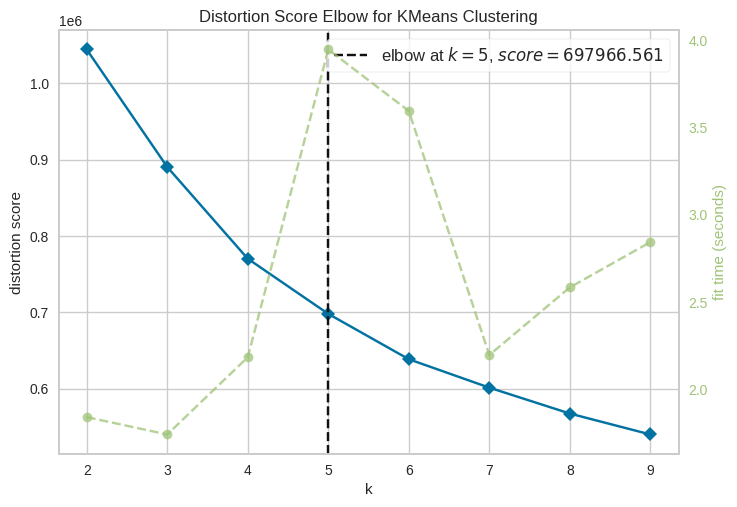

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized)
visualizer.show()

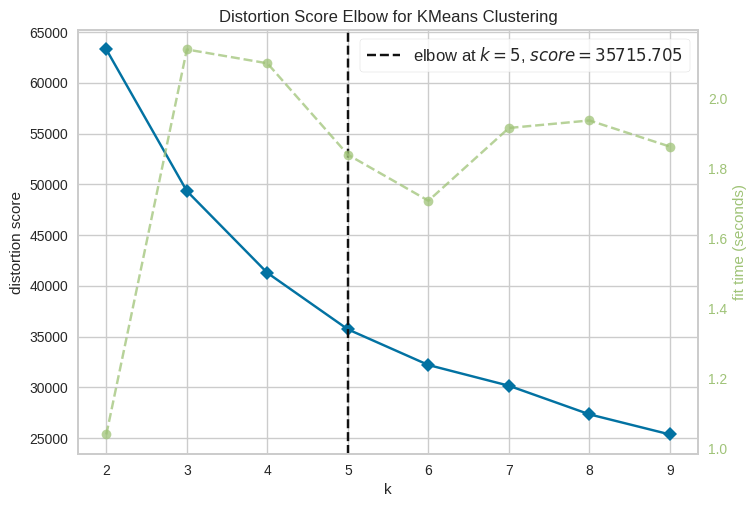

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Use the Elbow method to find the optimal number of clusters (k) with normalized data
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized_minmax)
visualizer.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhouette score in a function of number of clusters.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
X_normalized.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.477755   0.284726             -1.085559     0.608119          -0.065186   
1  1.012856   0.530888              0.555252     0.608119          -0.530008   
2  0.298306  -0.345360             -0.173997     0.608119          -0.208208   
3 -0.647925  -2.102410             -1.085559     0.608119          -0.530008   
4  0.903324   0.169579              0.464096     0.608119          -0.565764   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0     -0.507402       1.595355       -0.316019                 0.530072   
1     -0.507402       0.431437        3.093988                 0.879853   
2     -0.507402      -0.732482       -0.316019                 0.590351   
3      2.435146      -0.732482       -0.316019                -1.157456   
4      0.473447       0.819409       -0.316019                 0.964200   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0             -0.571346              -0.432258                0.212754   
1              0.304770              -0.432258                0.483499   
2             -0.402232              -0.432258               -0.509234   
3              0.889931               3.485837               -0.509234   
4             -0.671232              -0.111103               -0.379394   

   unharmed_in_month_ratio  
0                -0.279131  
1                 1.215140  
2                -0.279131  
3                -0.279131  
4                -0.279131

In [ ]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.719192              0.250000          1.0           0.379562   
1  0.526726   0.766758              0.531250          1.0           0.284672   
2  0.424894   0.597439              0.406250          1.0           0.350365   
3  0.290045   0.257919              0.250000          1.0           0.284672   
4  0.511117   0.696942              0.515625          1.0           0.277372   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0      0.000000       1.000000            0.00                 0.773661   
1      0.000000       0.500000            0.75                 0.892533   
2      0.000000       0.000000            0.00                 0.794147   
3      1.000000       0.000000            0.00                 0.200164   
4      0.333333       0.666667            0.00                 0.921198   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.060185               0.000000                0.131313   
1              0.209677               0.000000                0.180556   
2              0.089041               0.000000                0.000000   
3              0.309524               0.800000                0.000000   
4              0.043142               0.065574                0.023615   

   unharmed_in_month_ratio  
0                 0.000000  
1                 0.238095  
2                 0.000000  
3                 0.000000  
4                 0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

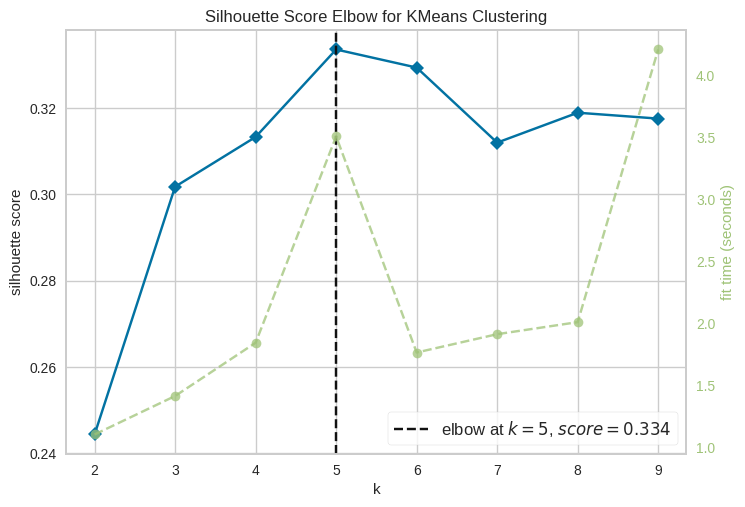

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized_minmax)
visualizer.show()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

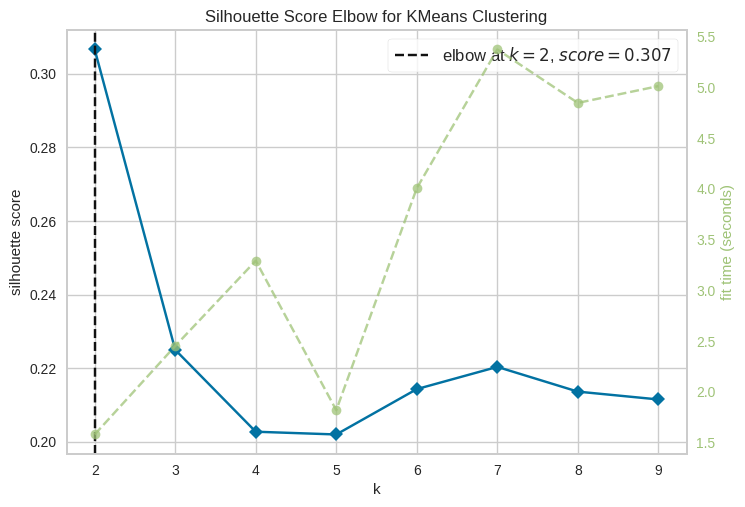

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized)
visualizer.show()
plt.show()

Using the standard scaler gives a lower sihouette score so we use the the minmax scaler

### Setting Optimal K value

In [ ]:
k_optimal = 5

## Characterization of Obtained Clusters

In [ ]:
# Perform K-means clustering with the optimal k value
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(X_normalized_minmax)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([3, 0, 4, ..., 1, 3, 3], dtype=int32)

In [ ]:
X_normalized_minmax['labels'] = labels

In [ ]:
X_normalized_minmax.to_csv('data/dataset_kmeans_5clusters.csv', index=False)

In [ ]:
# Print length of each obtained cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print(f"Cluster {k + 1}: {len(cluster_data)}")

Cluster 1: 8600
Cluster 2: 17429
Cluster 3: 17730
Cluster 4: 26431
Cluster 5: 22970


Cluster 1
          latitude    longitude  avg_age_participants  males_ratio  \
count  8600.000000  8600.000000           8600.000000  8600.000000   
mean      0.358917     0.671946              0.434202     0.890543   
std       0.147601     0.170585              0.165342     0.197780   
min       0.004053     0.156441              0.140625     0.500000   
25%       0.232667     0.628909              0.296875     1.000000   
50%       0.386264     0.698978              0.390625     1.000000   
75%       0.497894     0.768064              0.531250     1.000000   
max       0.718315     0.986666              1.000000     1.000000   

       povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
count        8600.000000   8600.000000    8600.000000     8600.000000   
mean            0.469652      0.138769       0.264196        0.747442   
std             0.221899      0.213808       0.241121        0.123268   
min             0.000000      0.000000       0.000000        0.3750

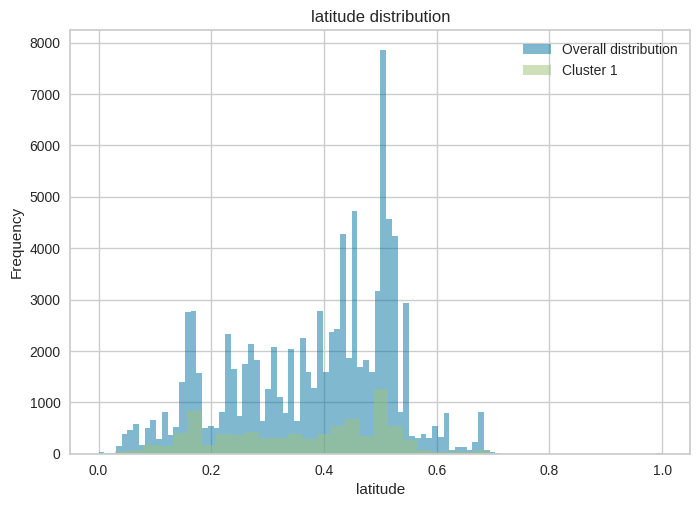

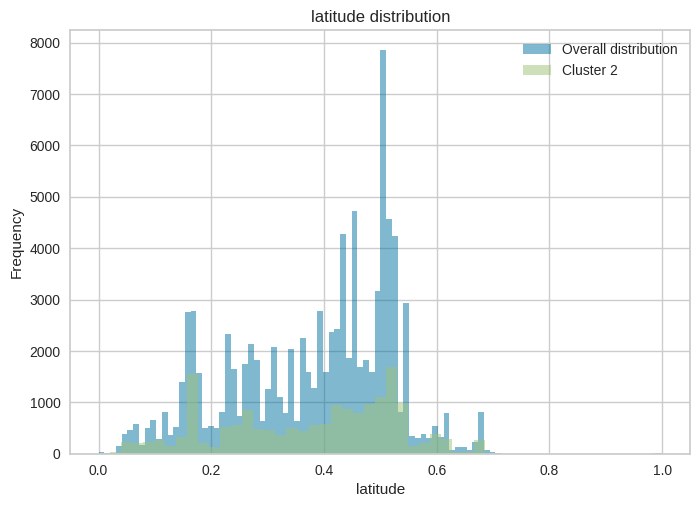

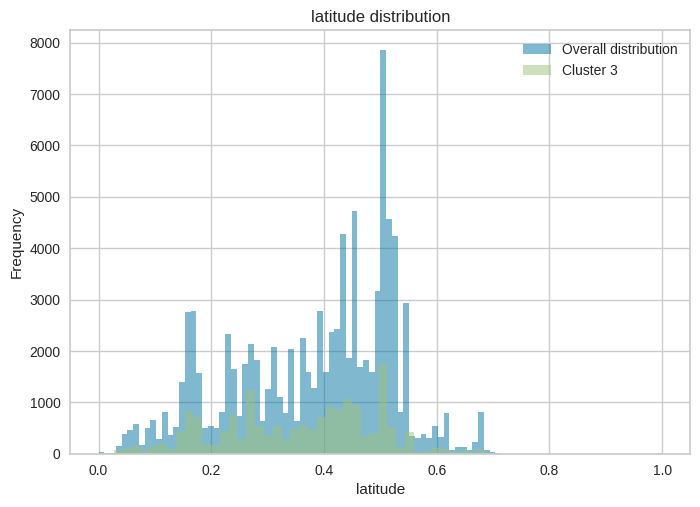

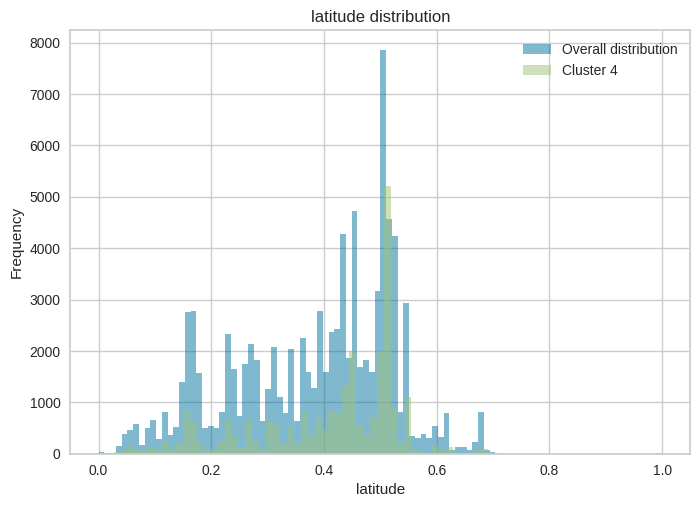

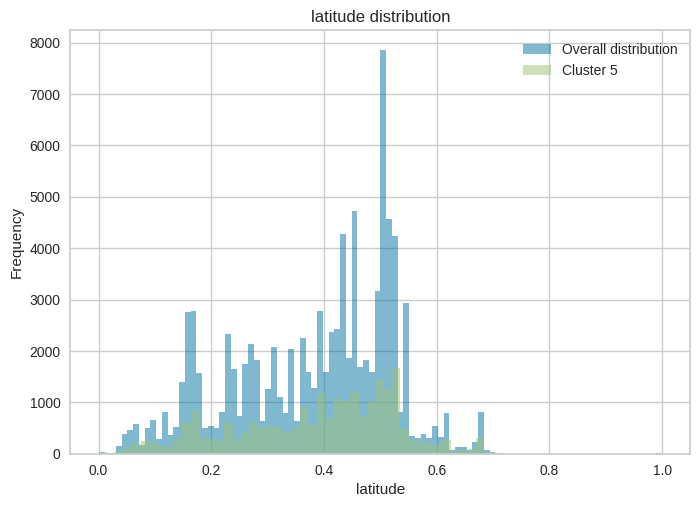

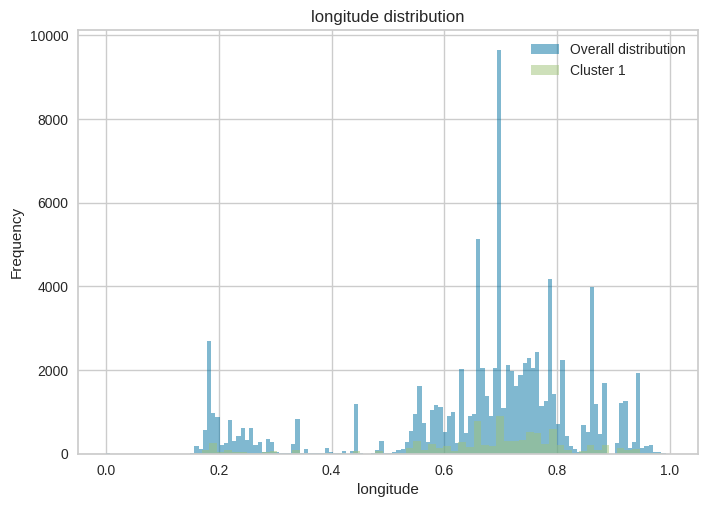

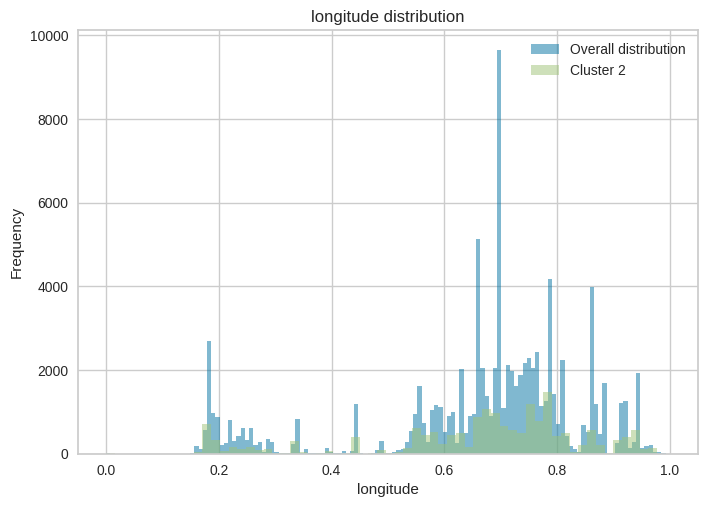

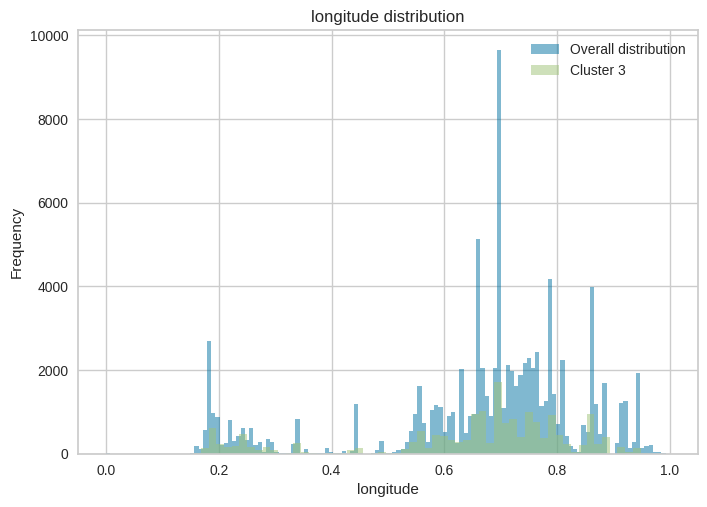

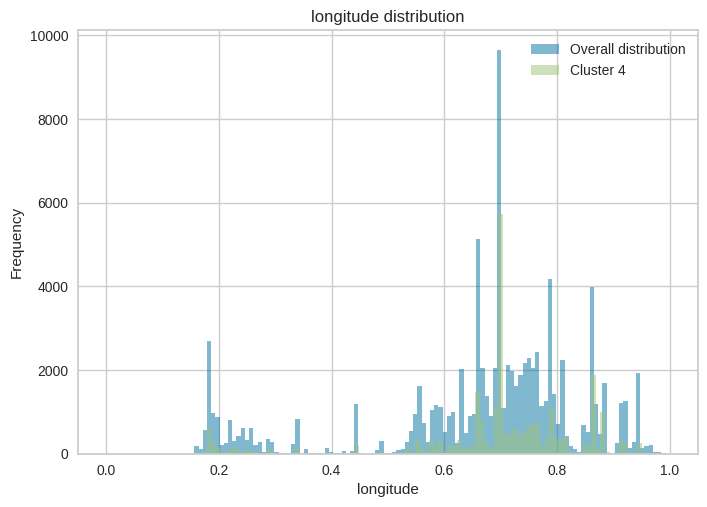

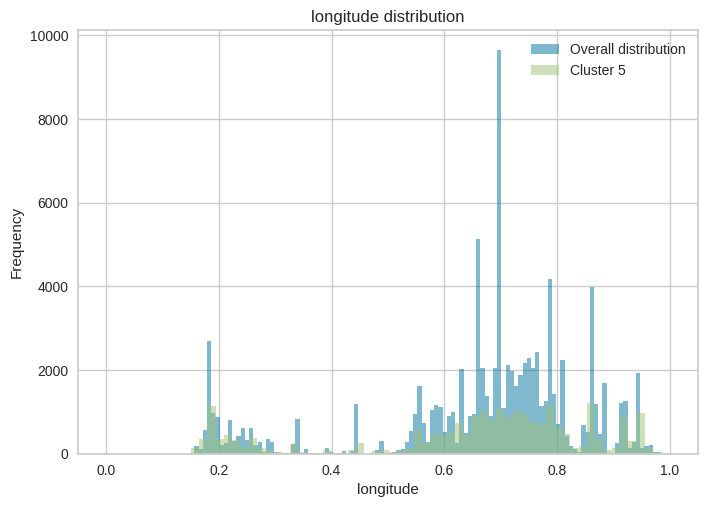

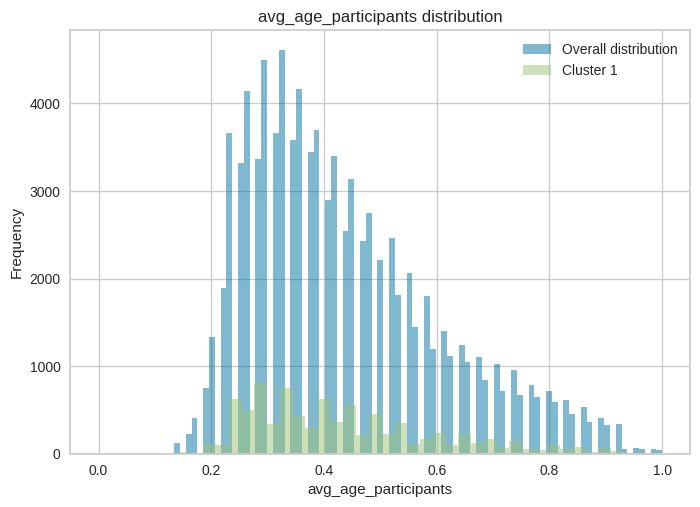

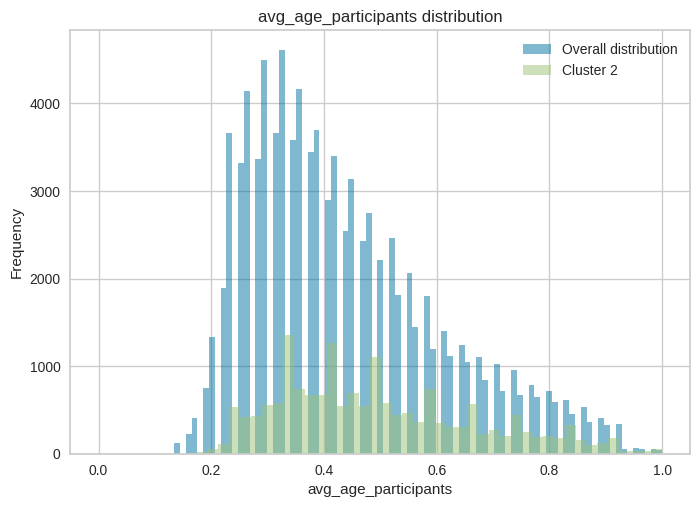

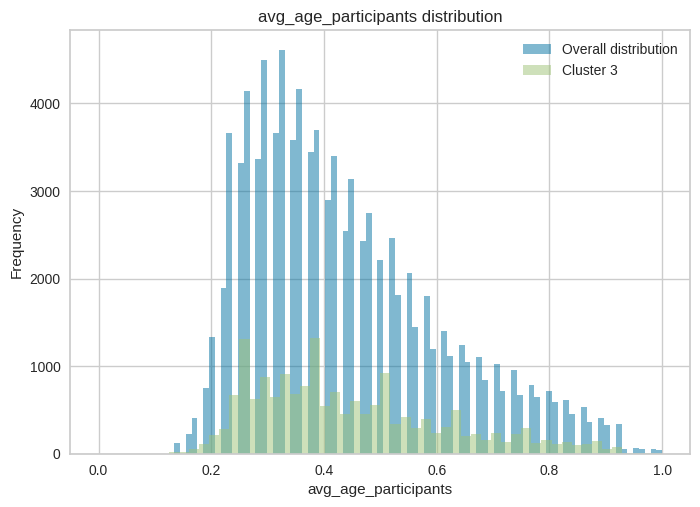

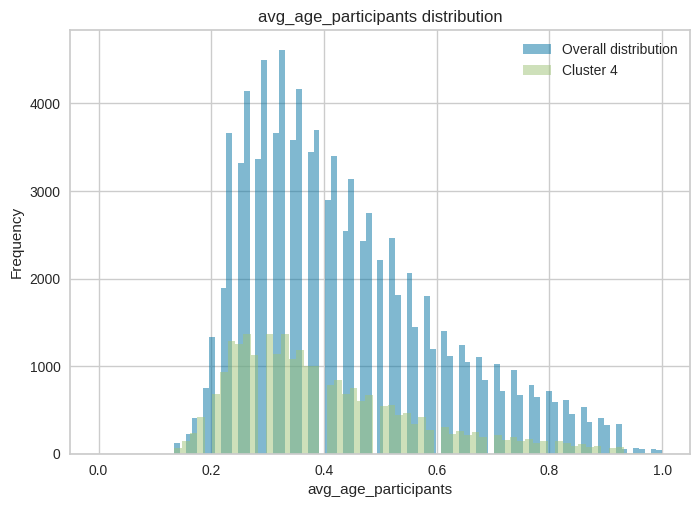

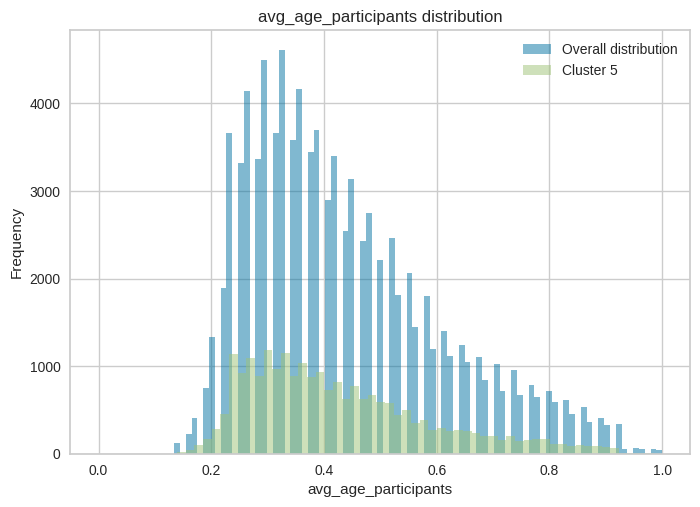

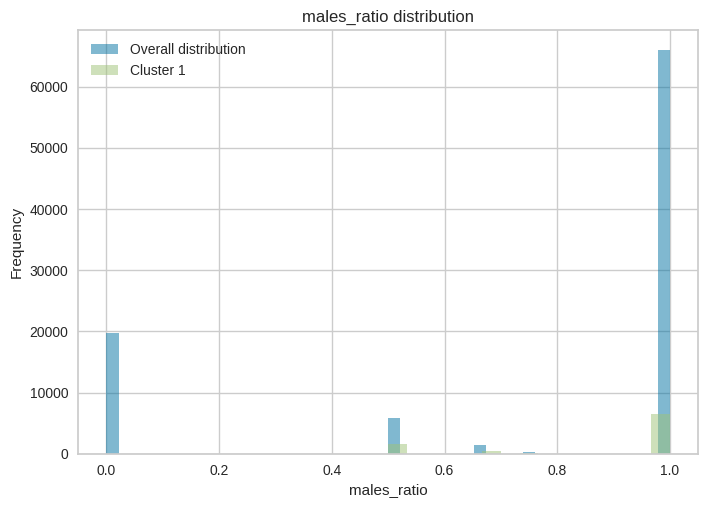

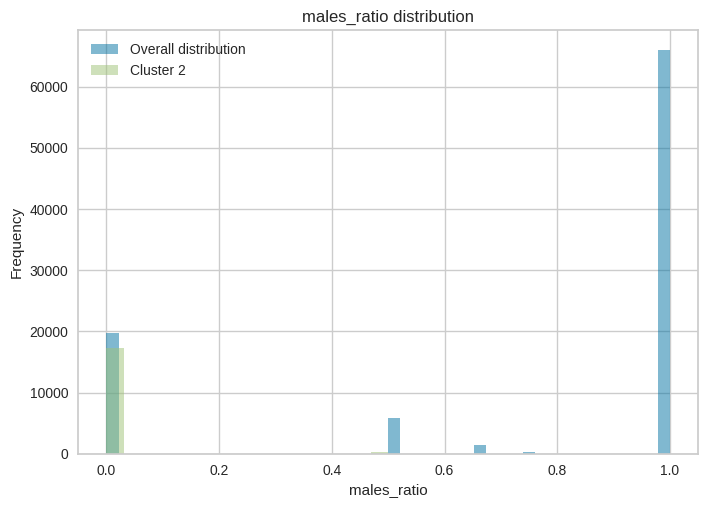

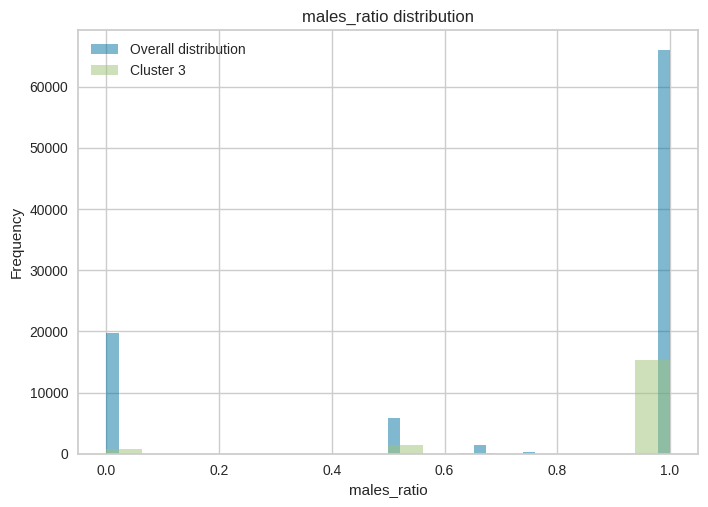

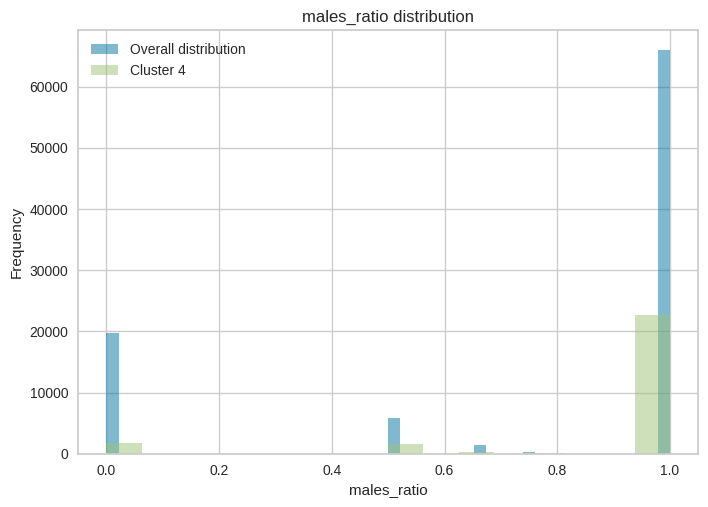

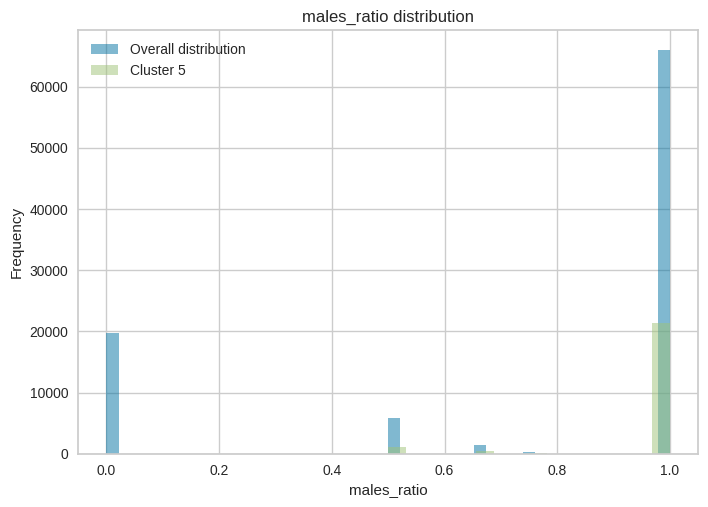

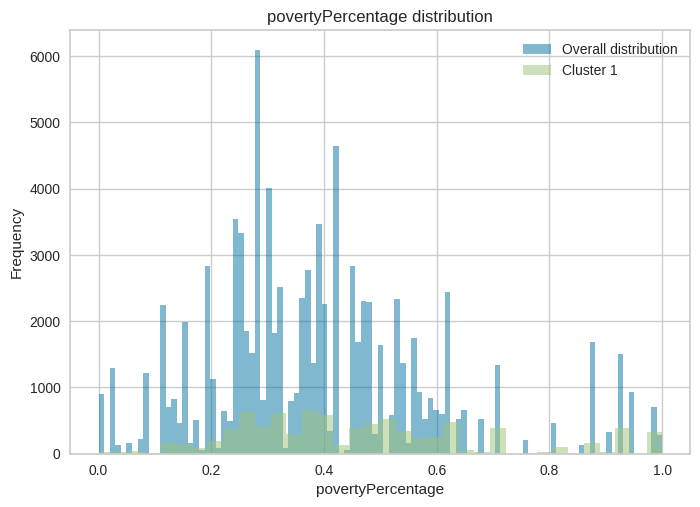

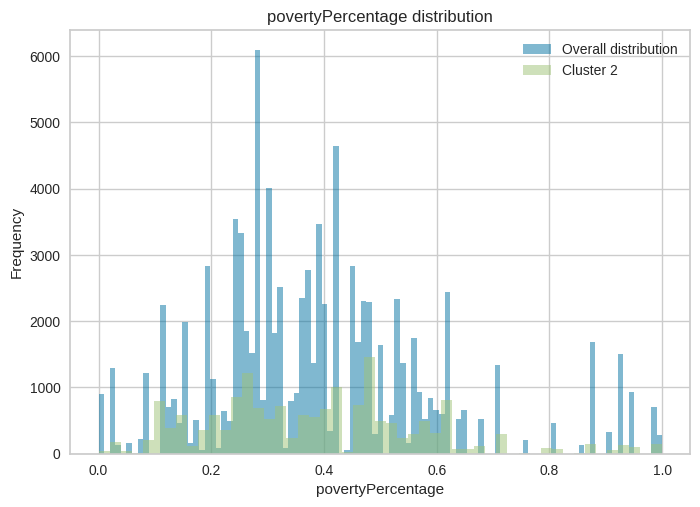

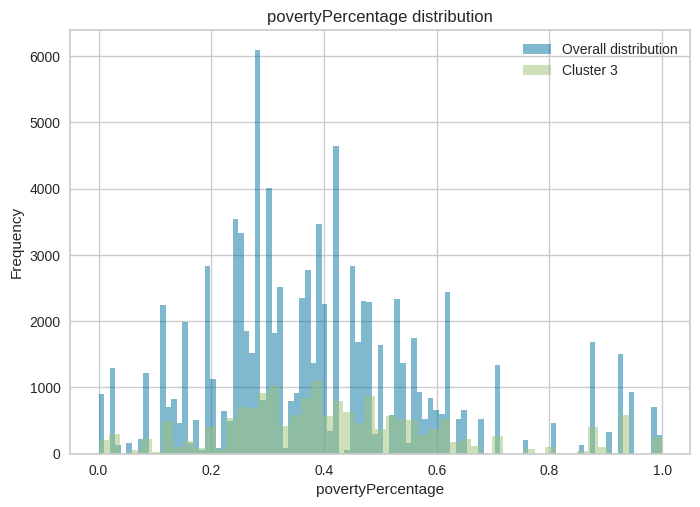

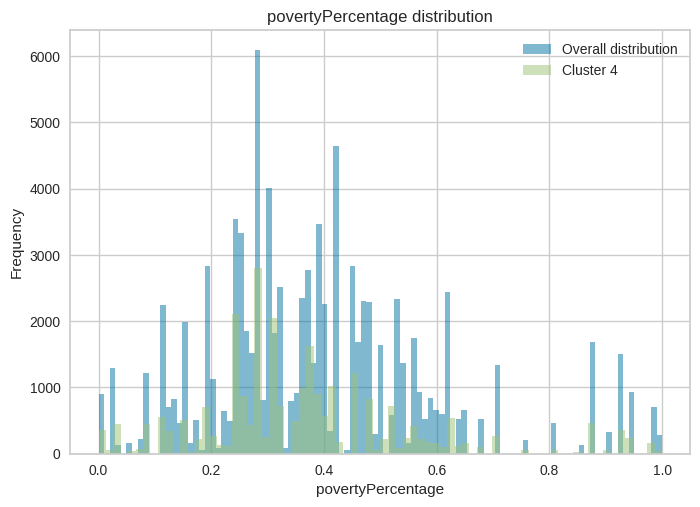

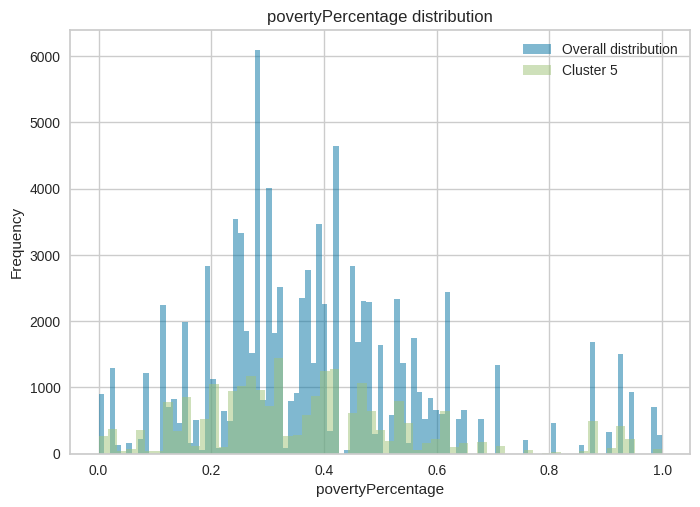

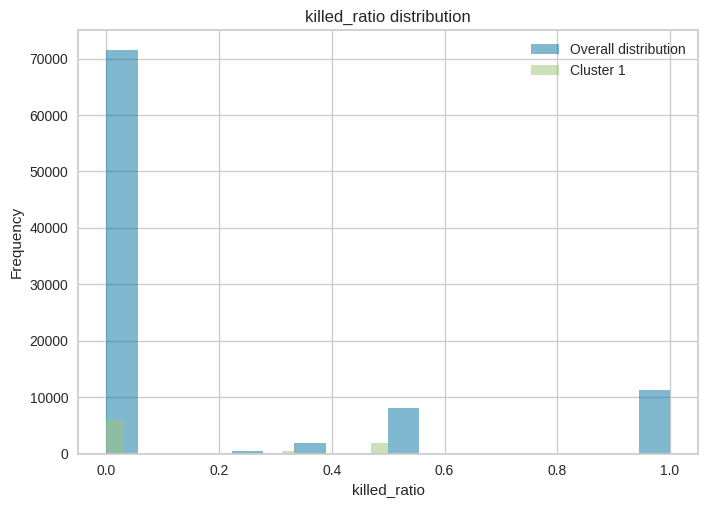

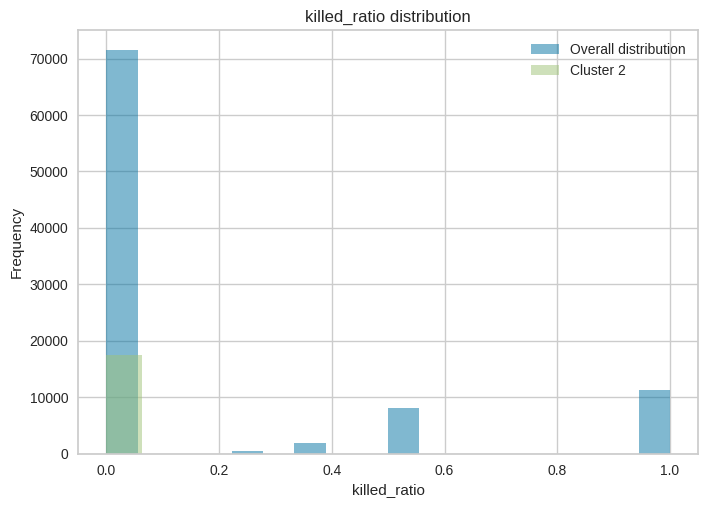

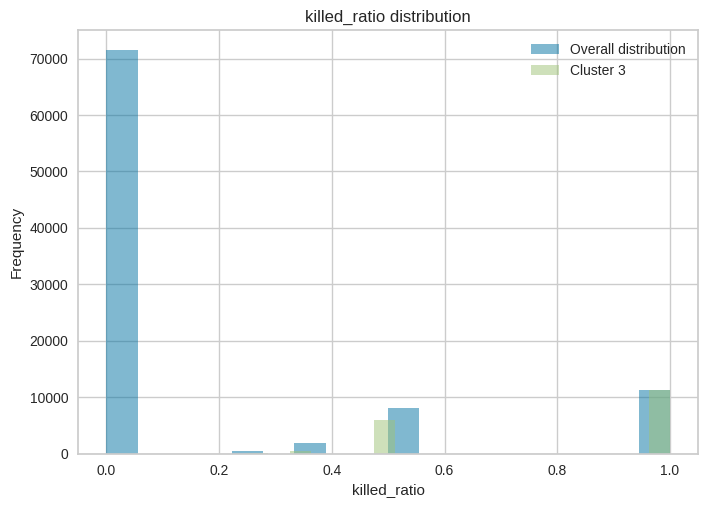

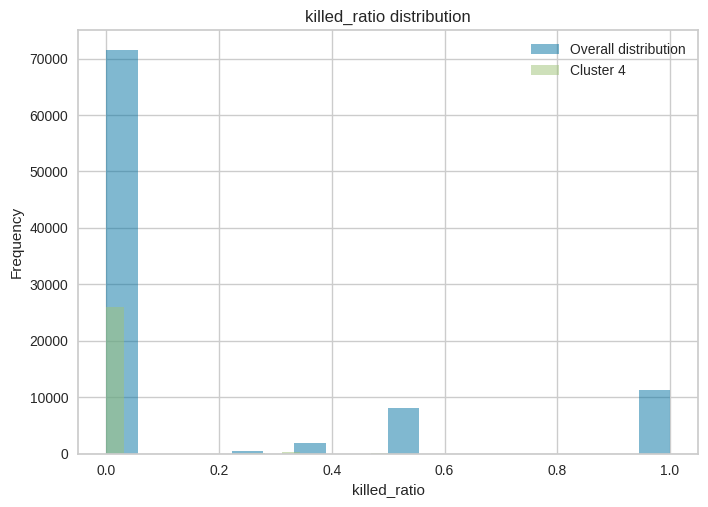

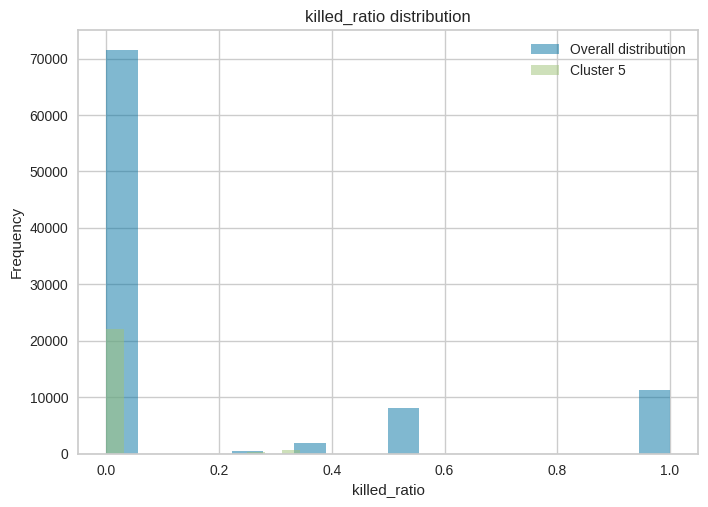

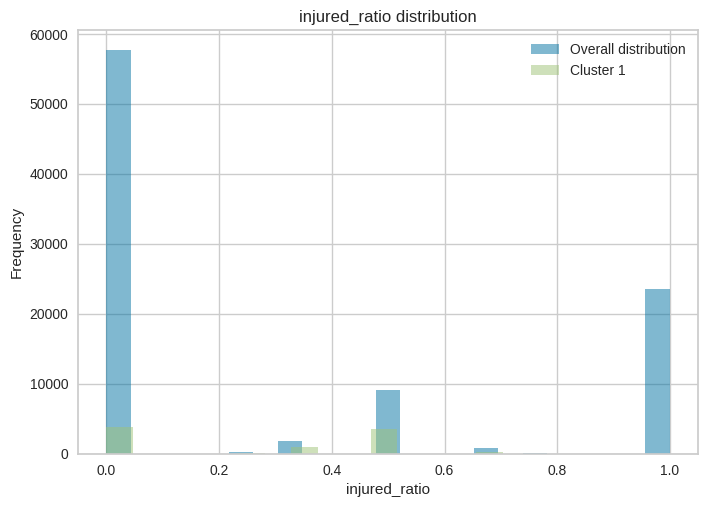

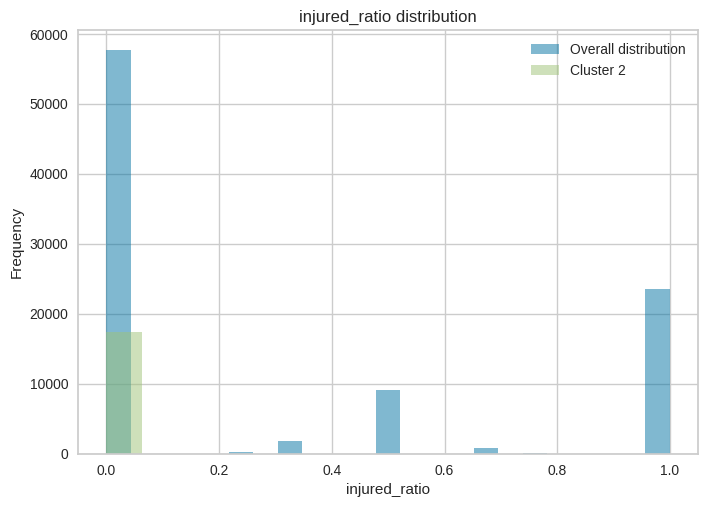

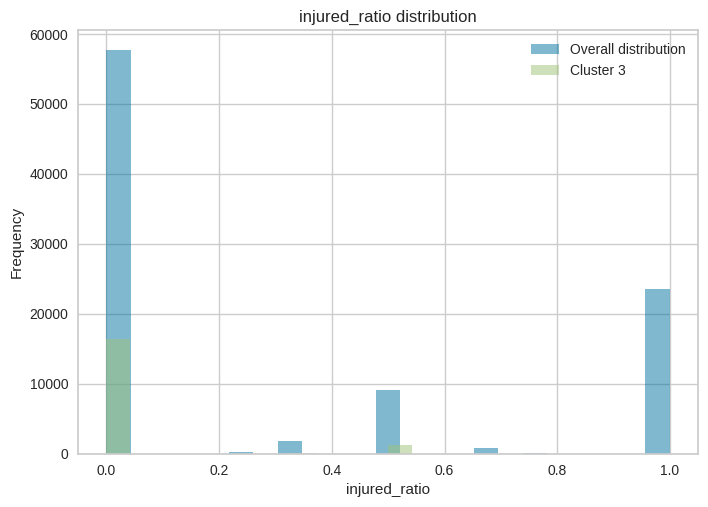

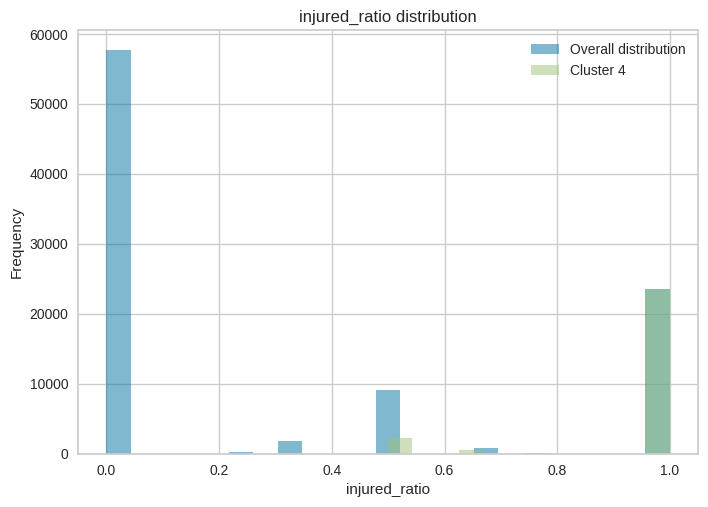

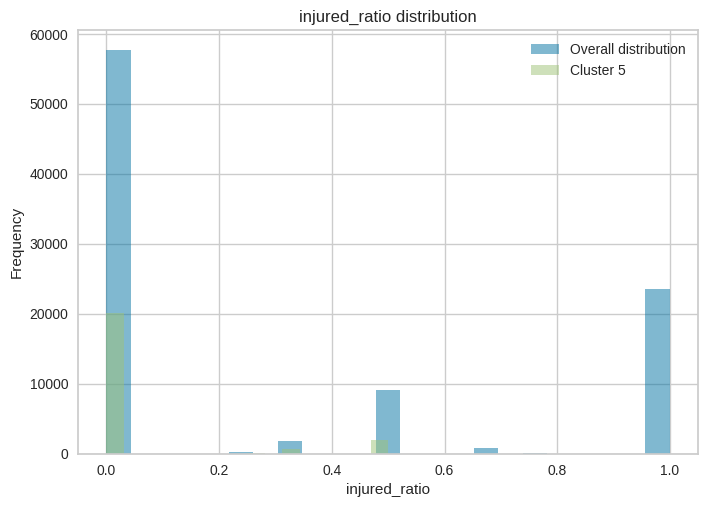

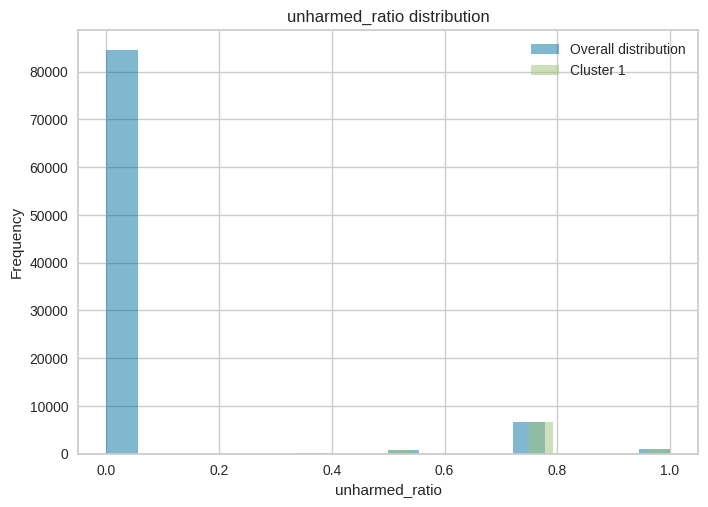

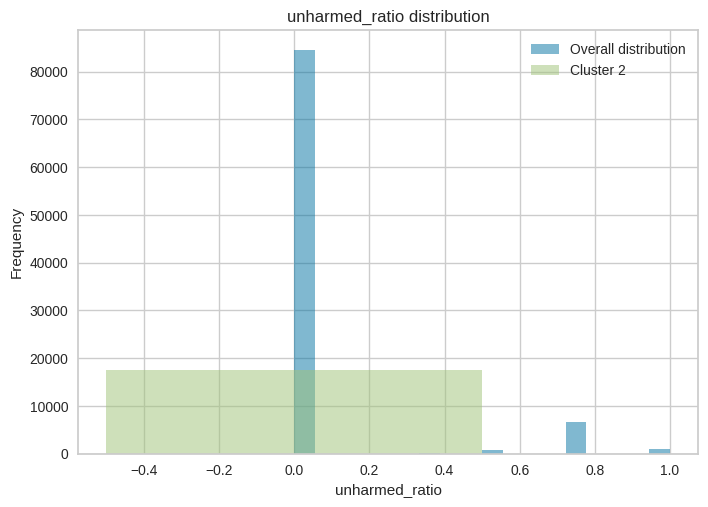

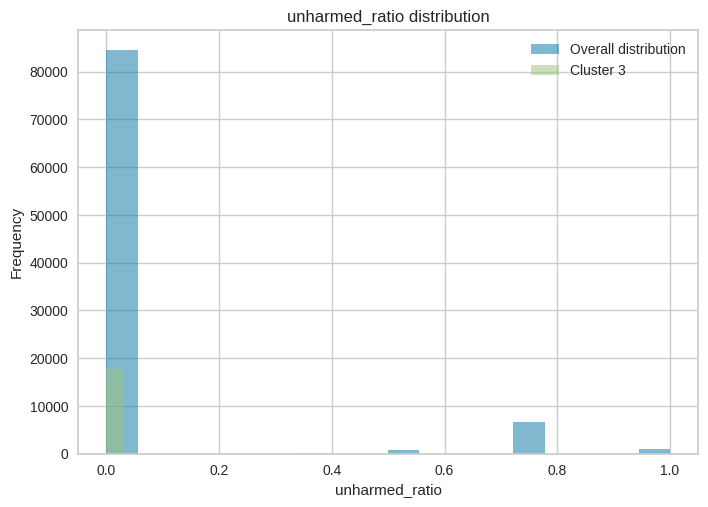

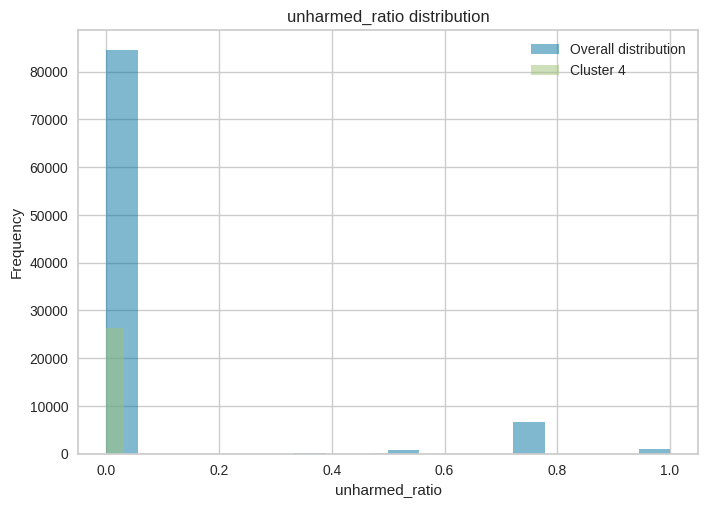

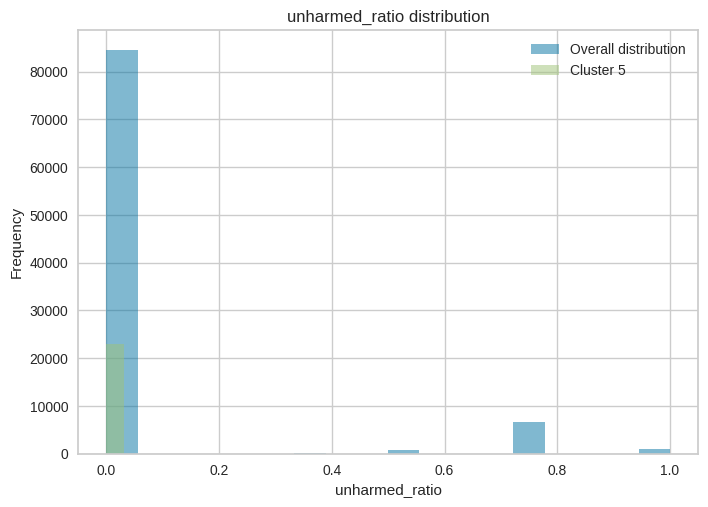

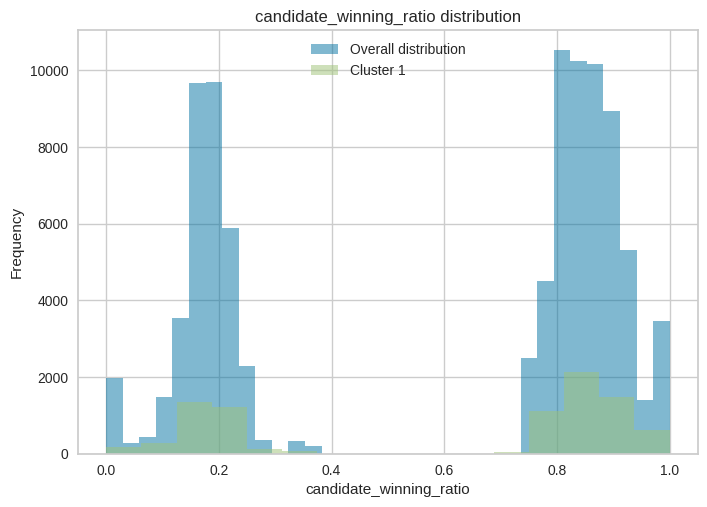

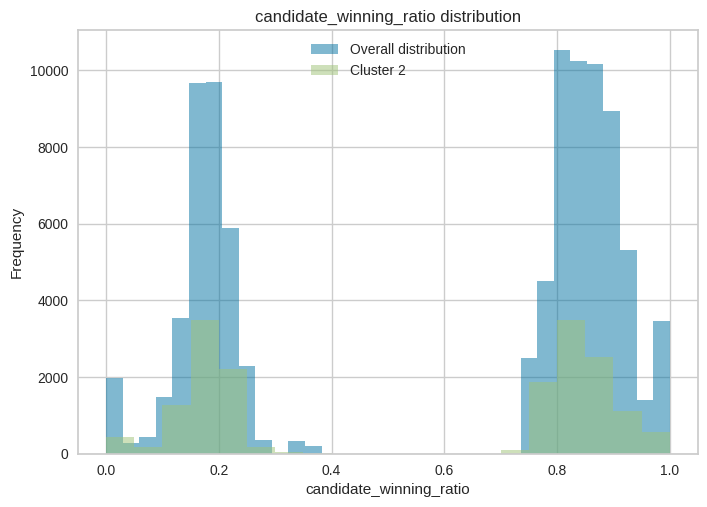

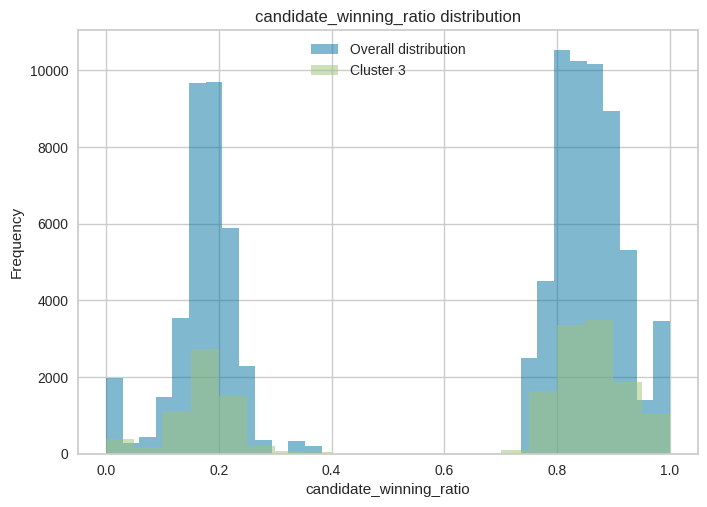

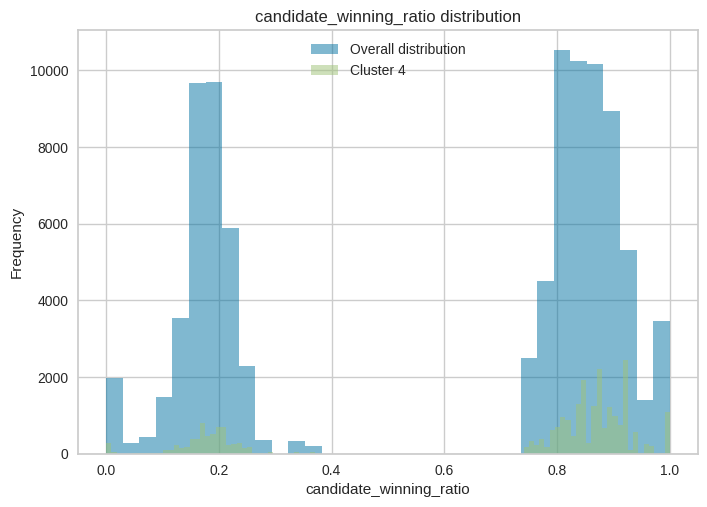

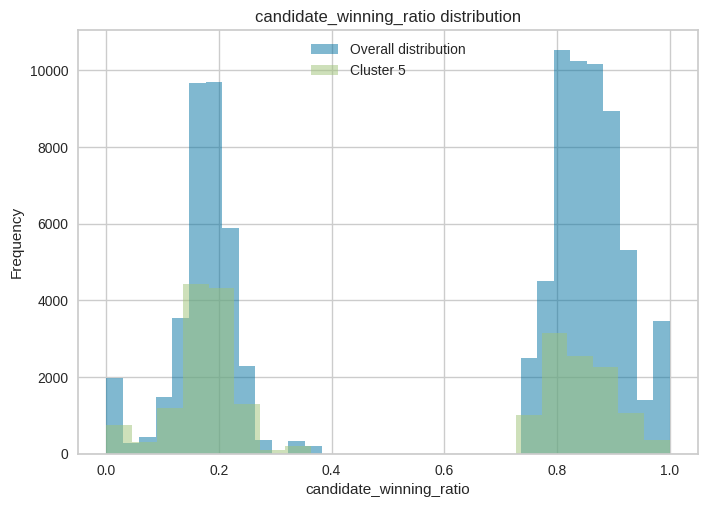

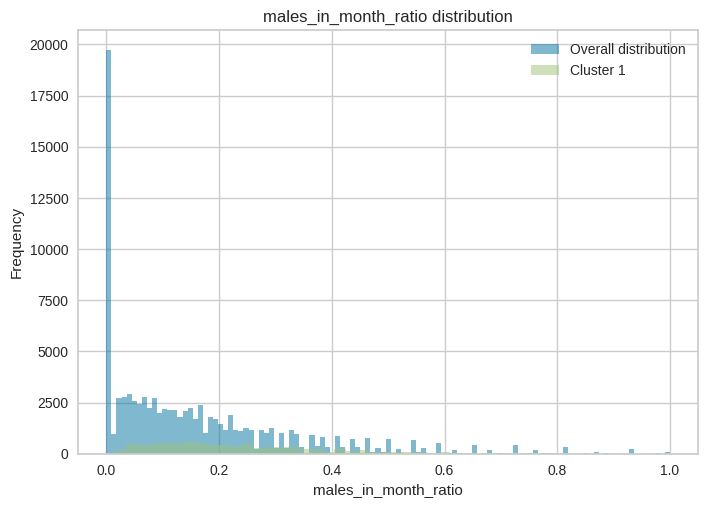

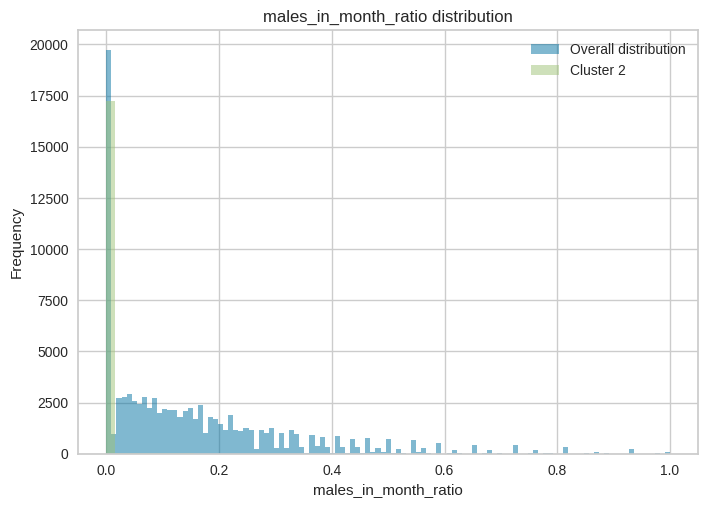

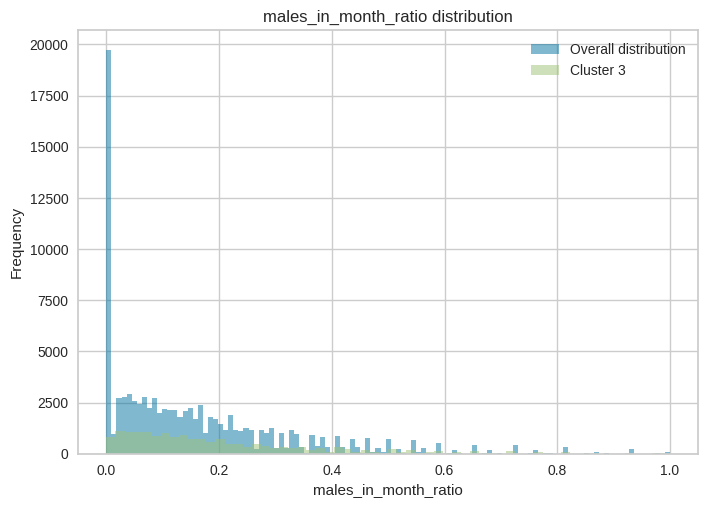

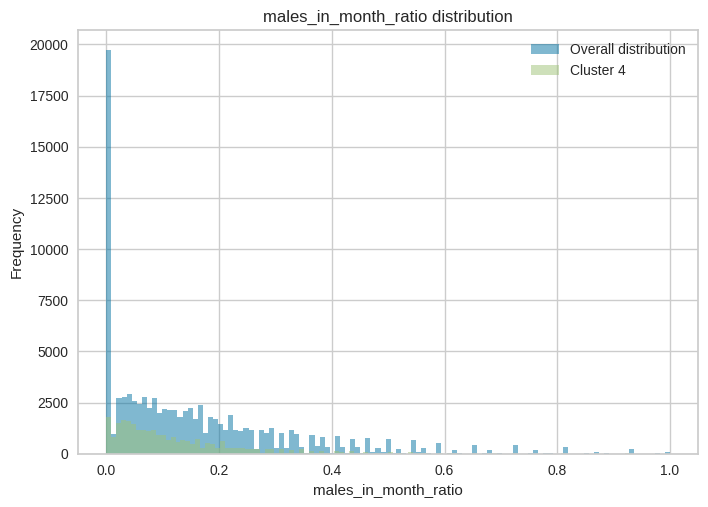

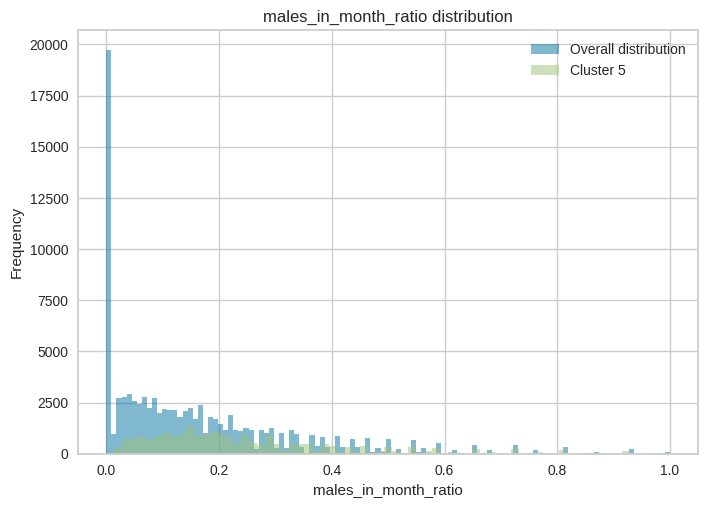

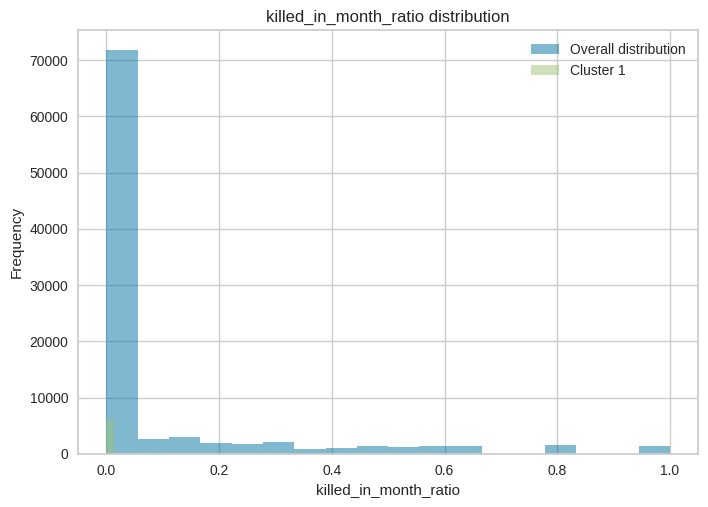

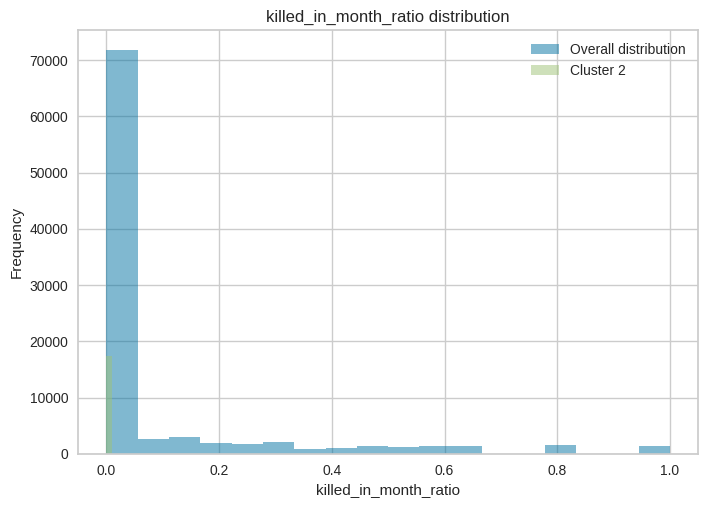

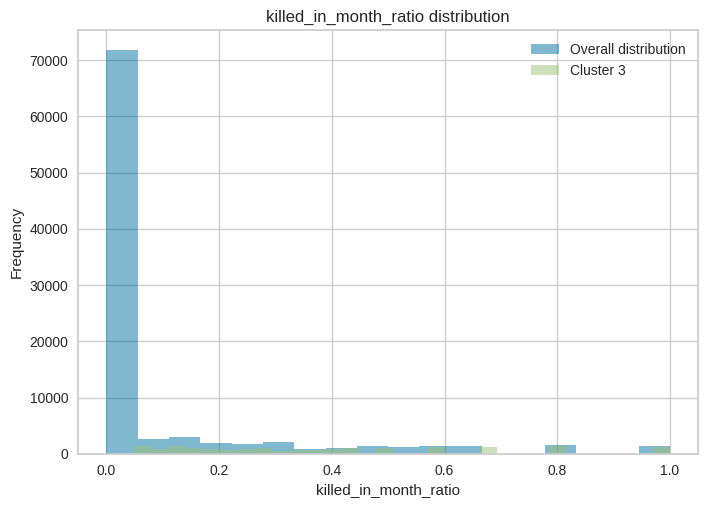

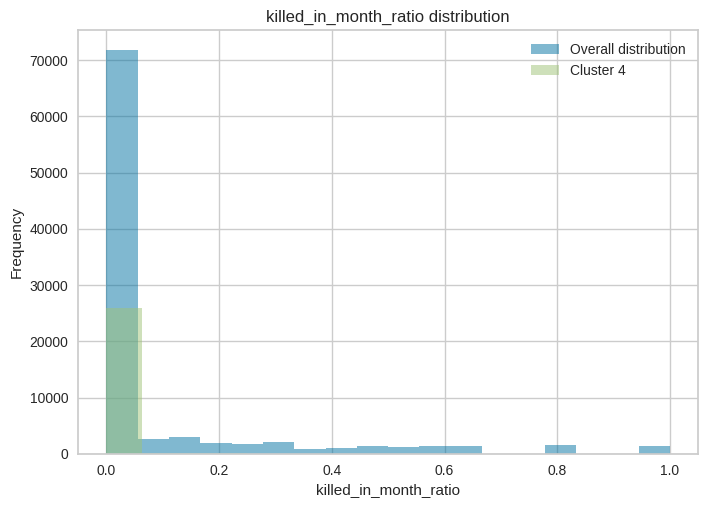

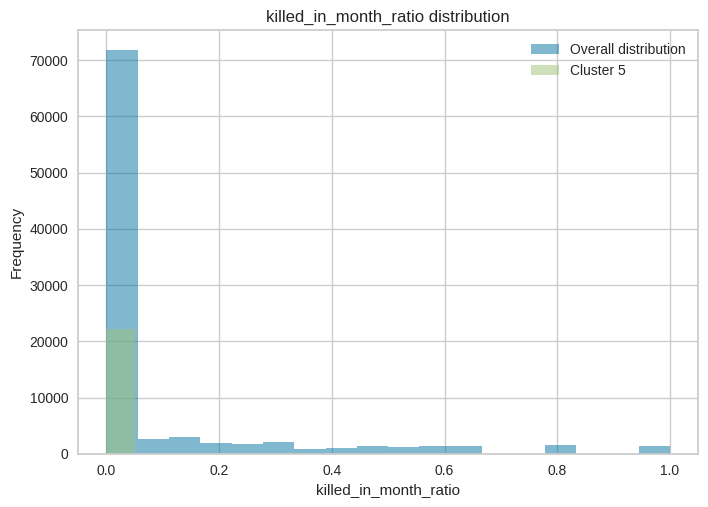

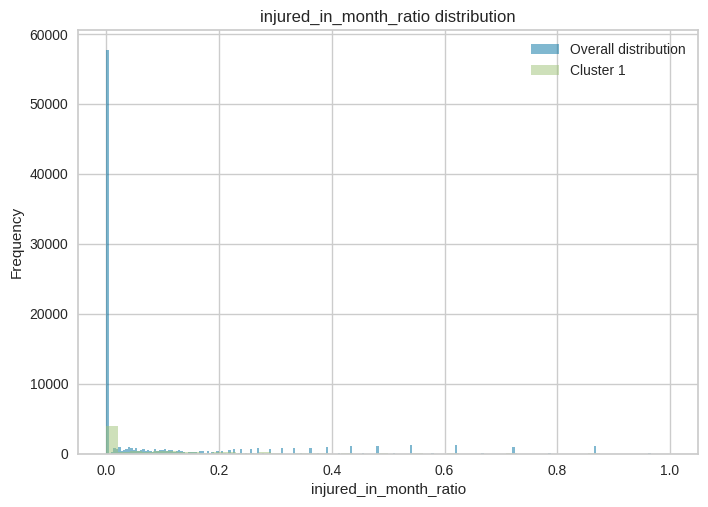

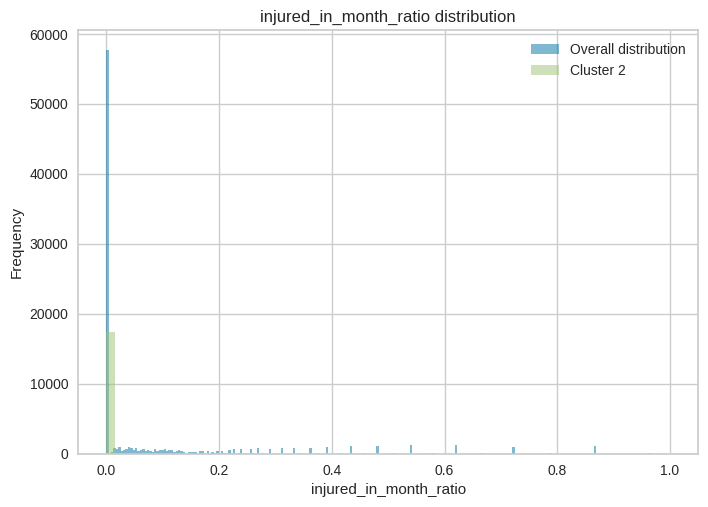

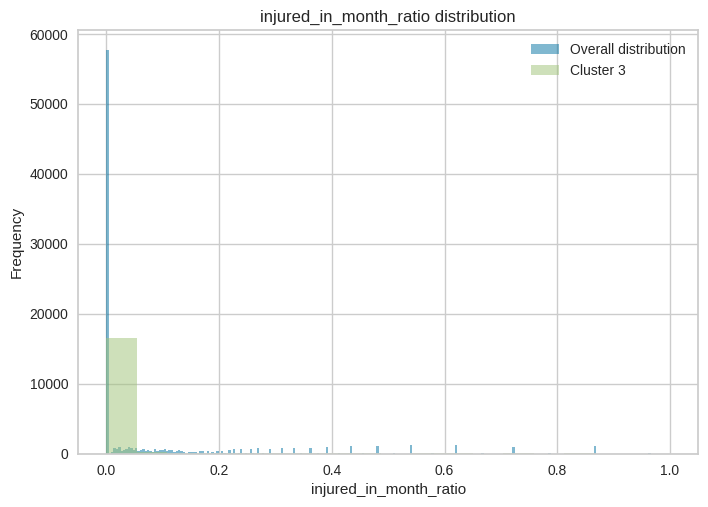

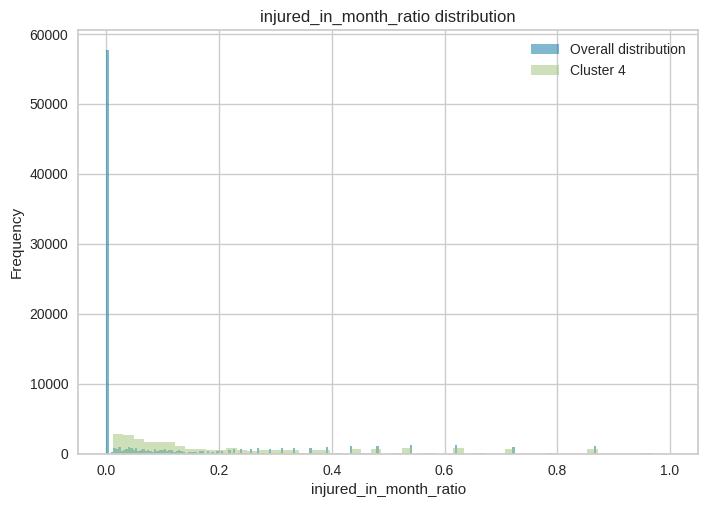

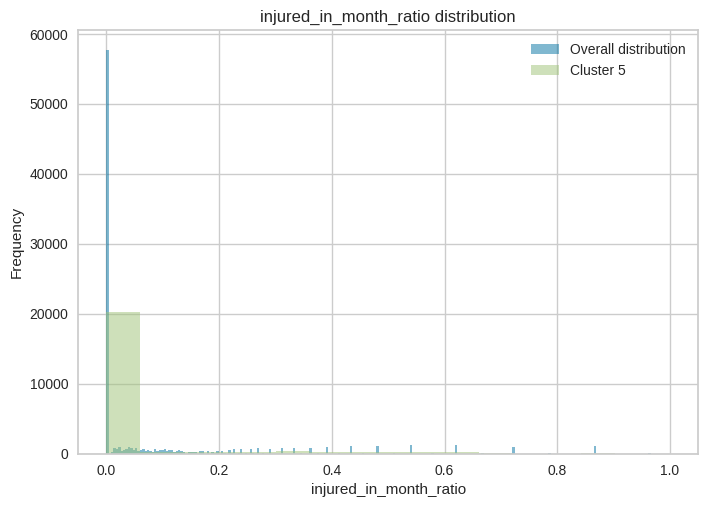

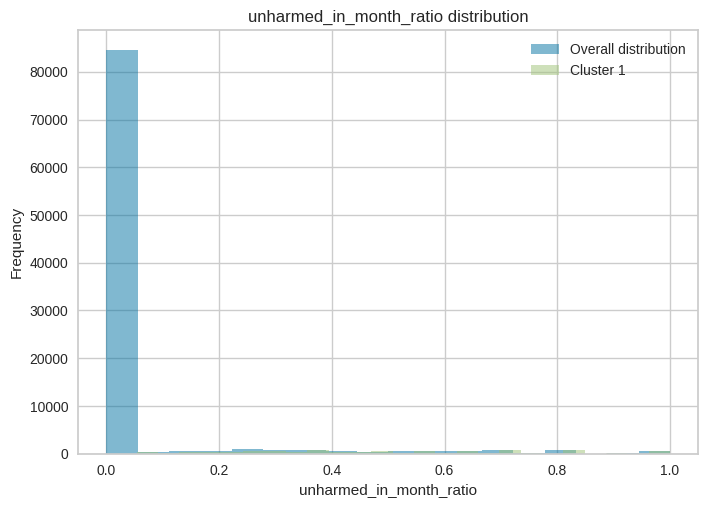

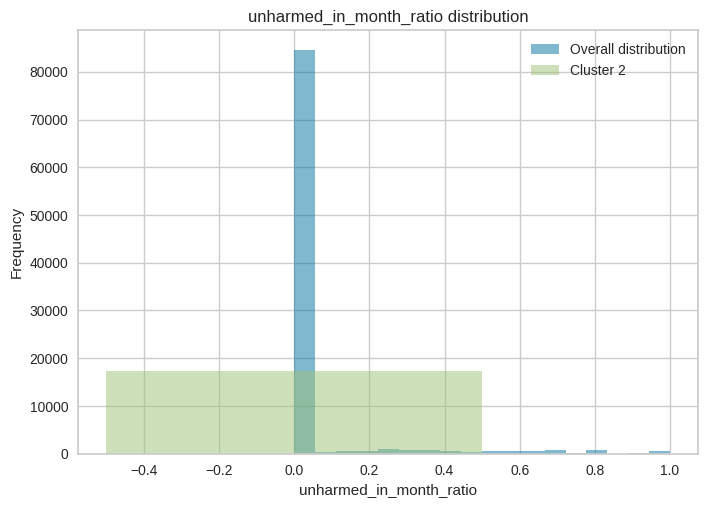

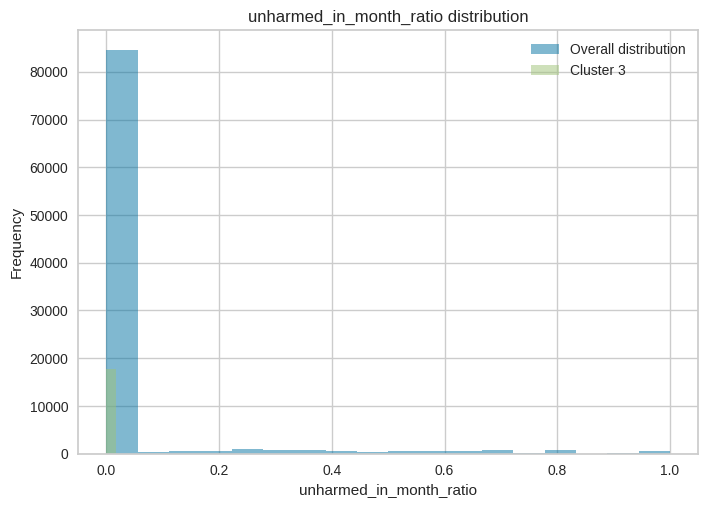

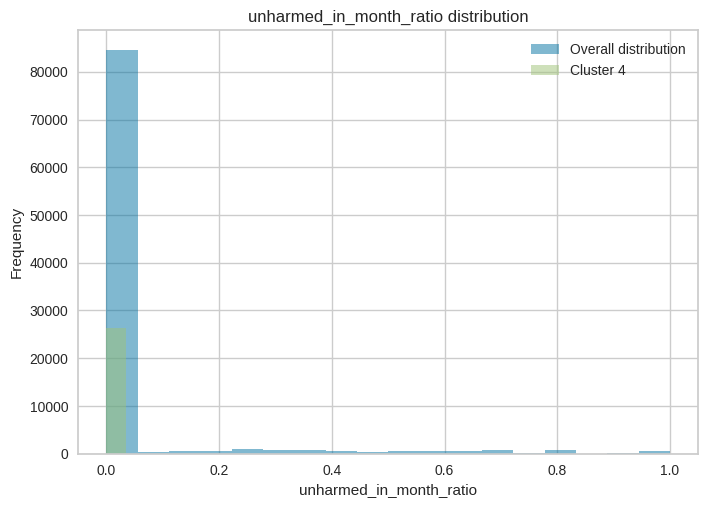

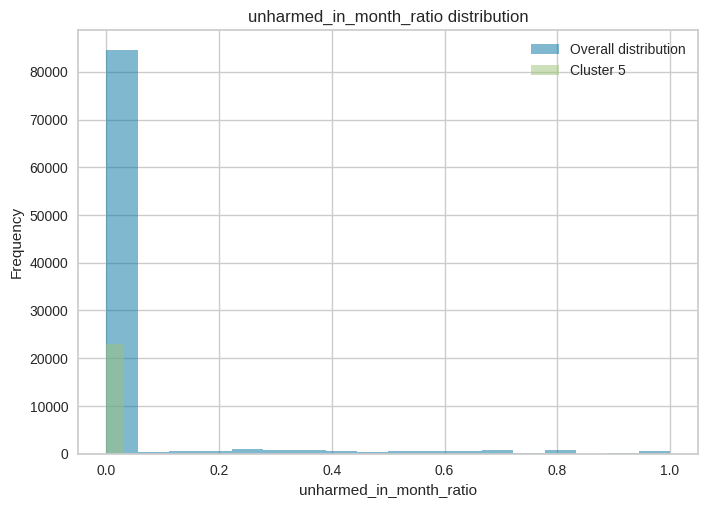

In [ ]:
# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print('Cluster', k + 1)
    print(cluster_data.describe())

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    if col != 'labels':
      all_data = X_normalized_minmax[col]
      for k in range(k_optimal):
          cluster_data = X_normalized_minmax[labels == k][col]
          plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
          plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
          plt.title(f'{col} distribution')
          plt.xlabel(col)
          plt.ylabel('Frequency')
          plt.legend()
          plt.show()


## Evaluation of Clustering Results for K=5

In [ ]:
X_normalized_minmax.drop(columns=['labels'], inplace=True)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette_score_val = silhouette_score(X_normalized_minmax, labels)
print(f'Silhouette score: {silhouette_score_val:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val = calinski_harabasz_score(X_normalized_minmax, labels)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val:.2f}')

Silhouette score: 0.33
Calinski-Harabasz score: 30721.36


### Try Different Values of  K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
           latitude     longitude  avg_age_participants   males_ratio  \
count  17136.000000  17136.000000          17136.000000  17136.000000   
mean       0.353305      0.640745              0.444722      0.918335   
std        0.136331      0.196133              0.171641      0.232049   
min        0.027313      0.154588              0.000000      0.000000   
25%        0.245565      0.584273              0.312500      1.000000   
50%        0.375573      0.697245              0.406250      1.000000   
75%        0.454579      0.766272              0.546875      1.000000   
max        0.715833      0.989424              1.000000      1.000000   

       povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
count       17136.000000  17136.000000   17136.000000    17136.000000   
mean            0.425640      0.822956       0.022005        0.000029   
std             0.211848      0.245781       0.100589        0.003820   
min             0.000000      0.250000  

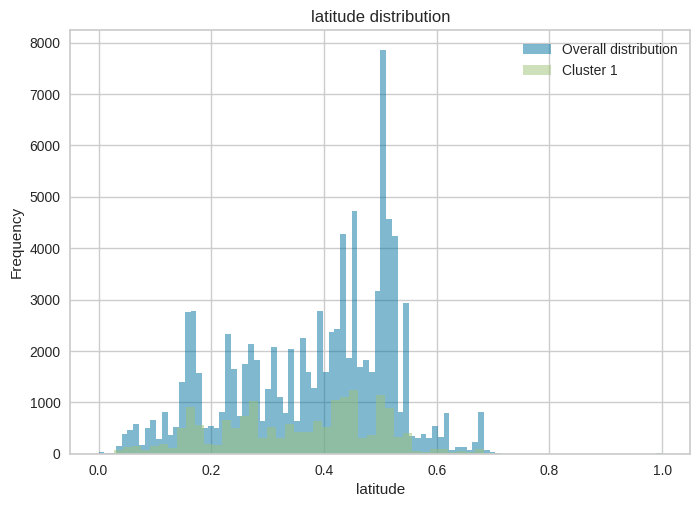

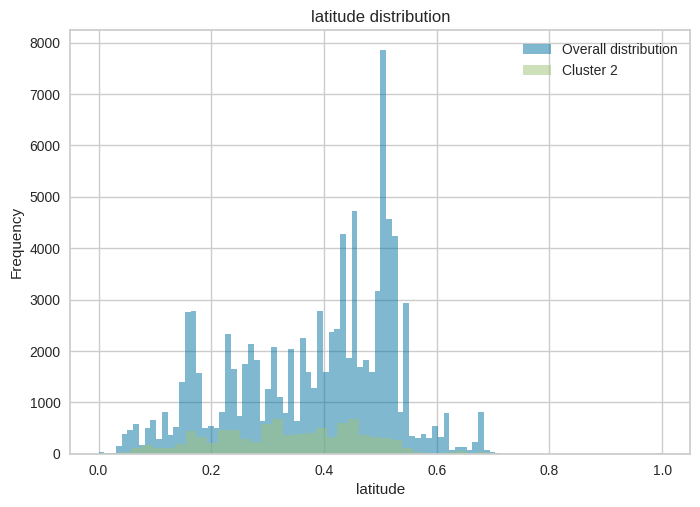

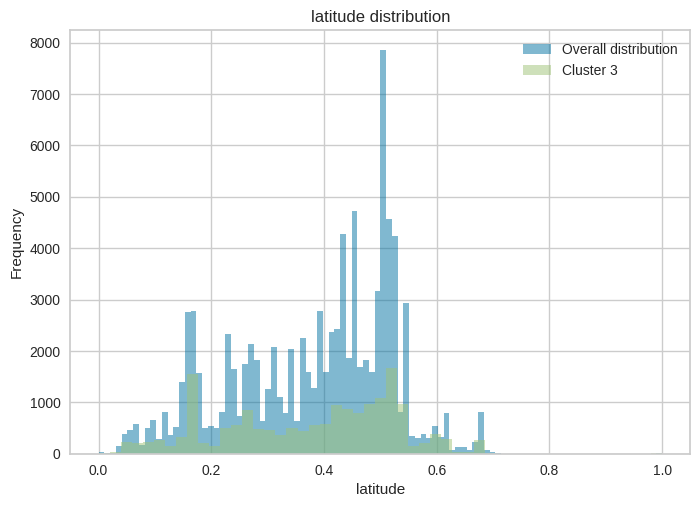

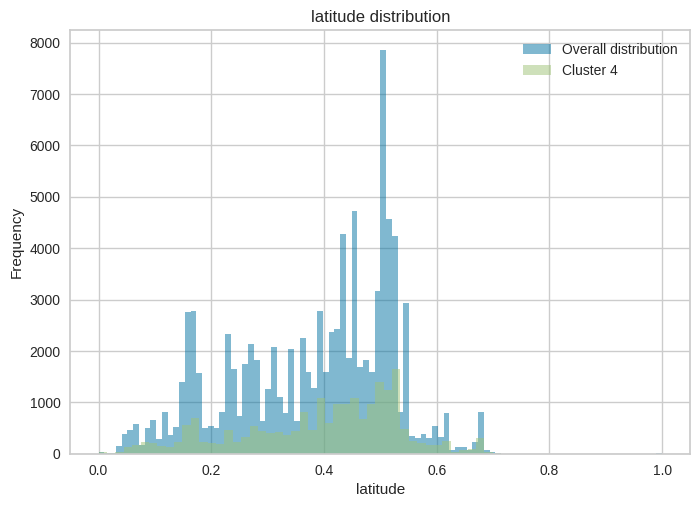

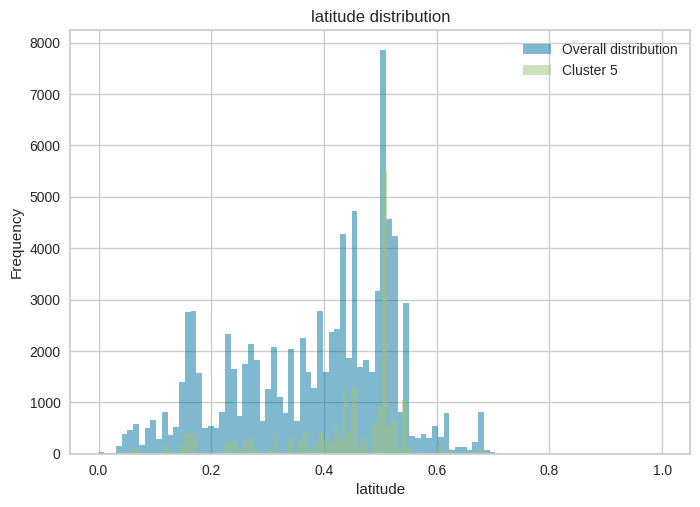

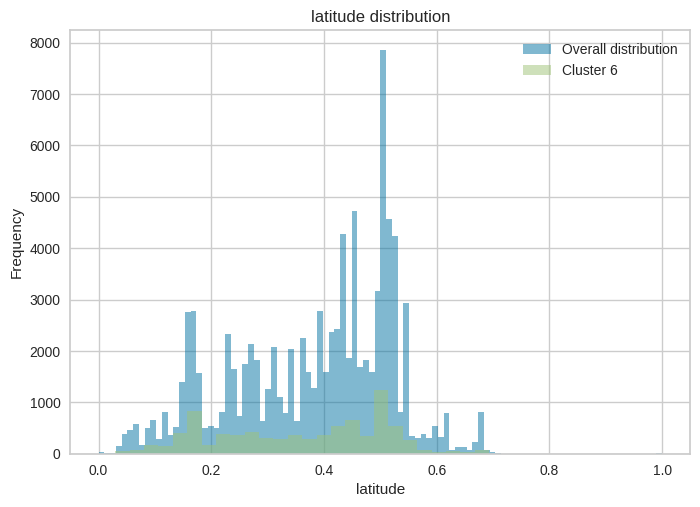

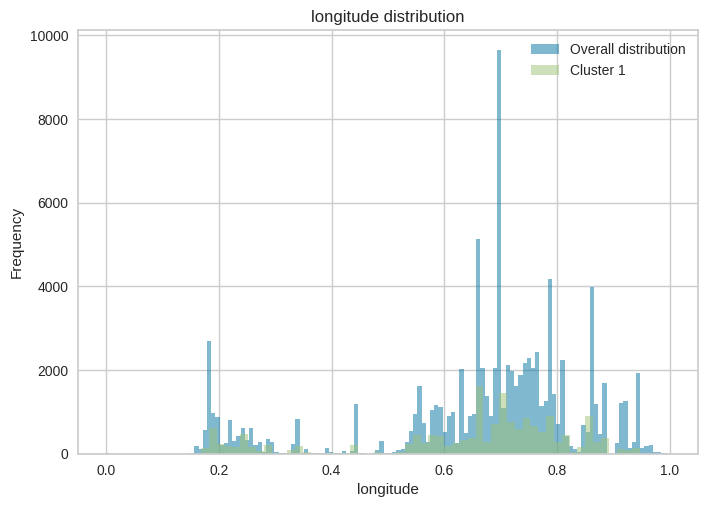

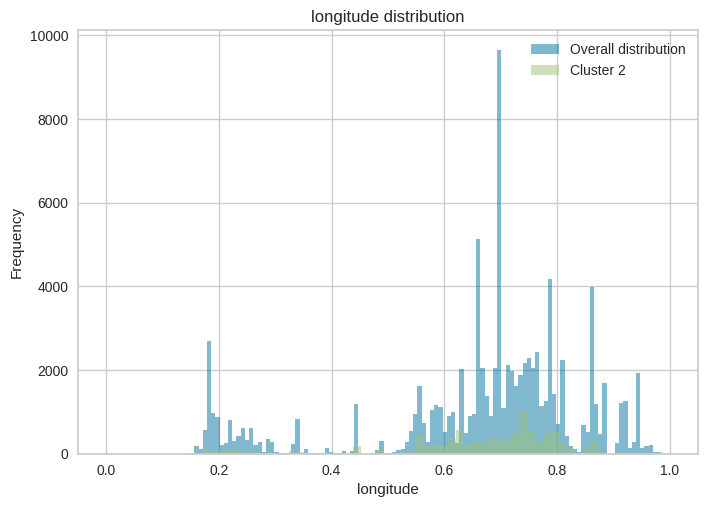

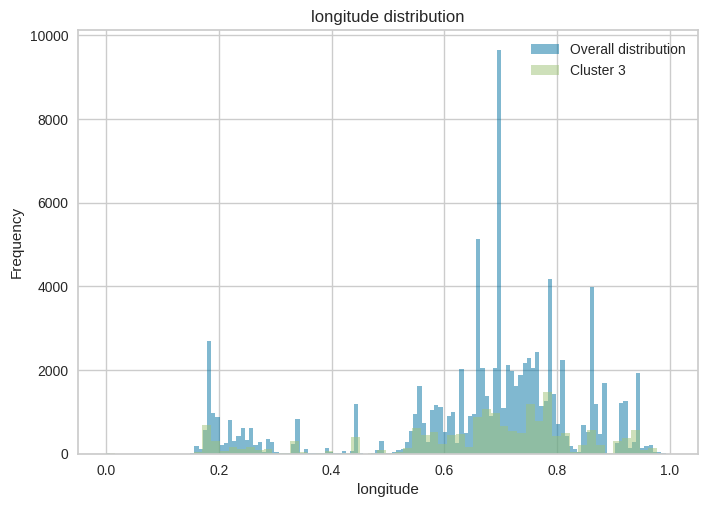

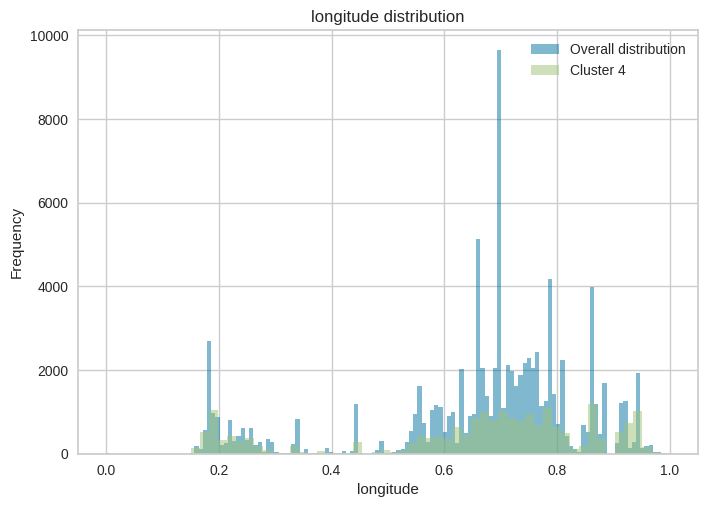

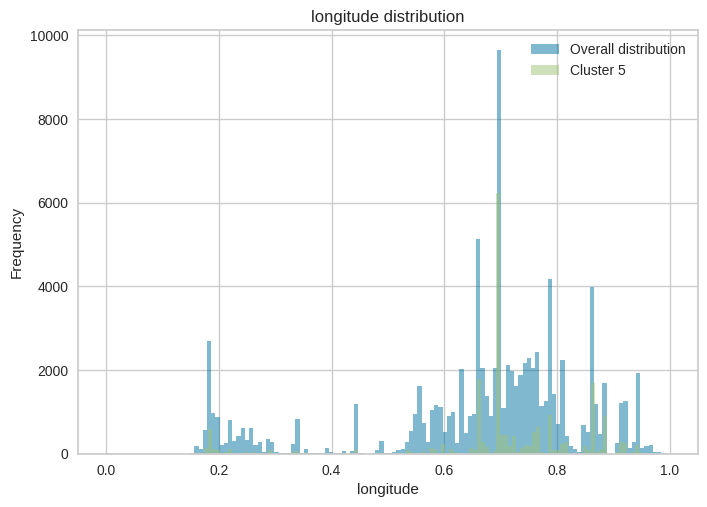

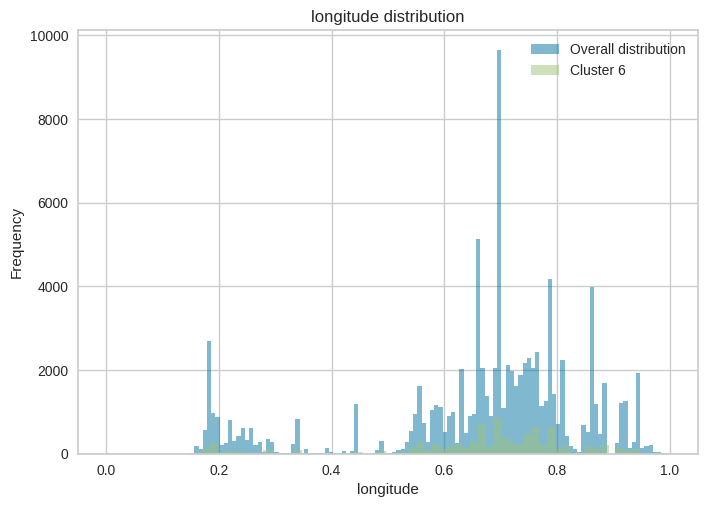

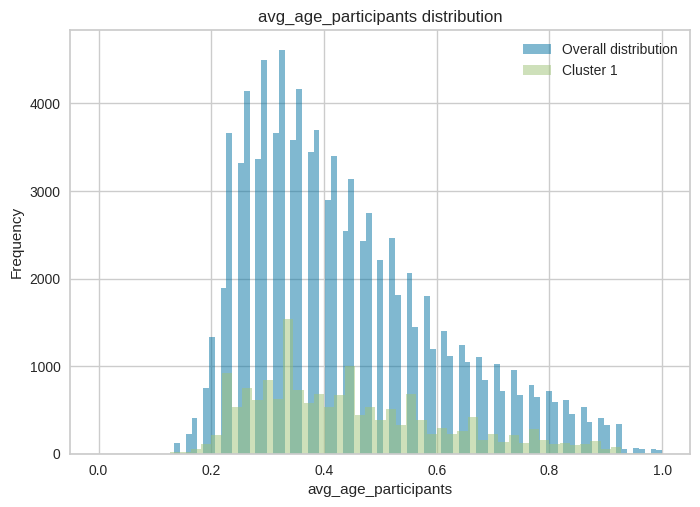

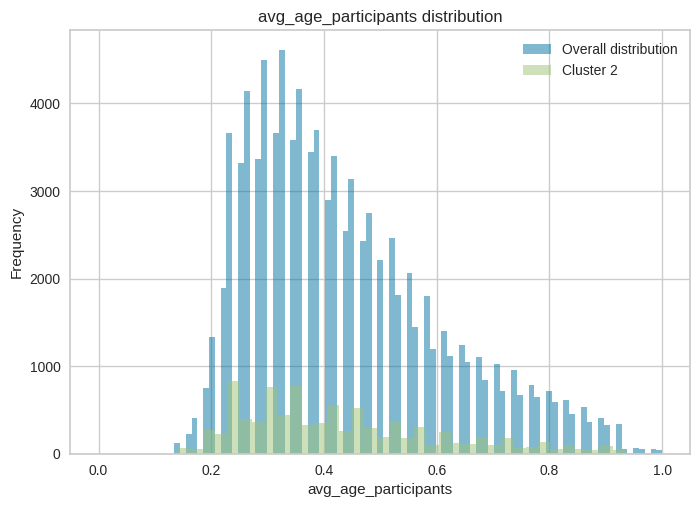

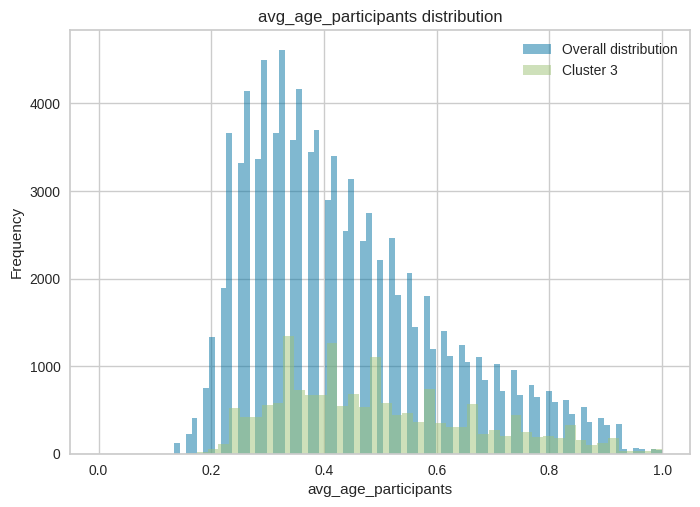

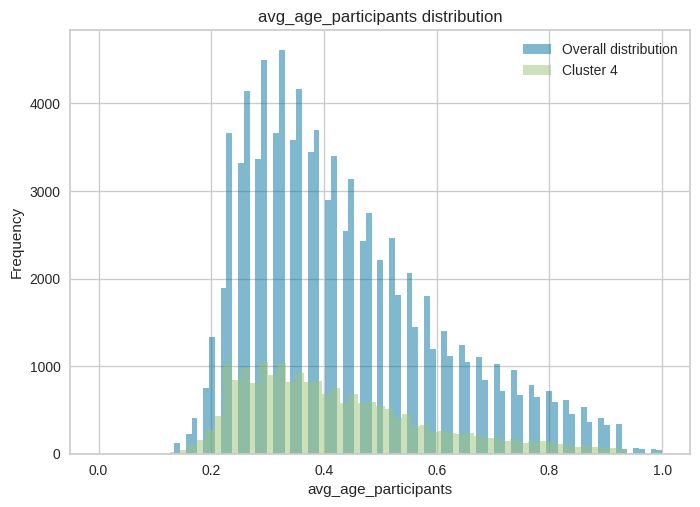

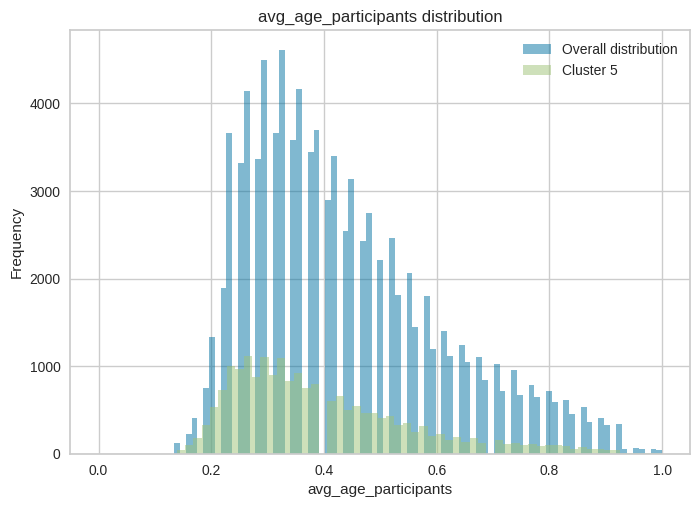

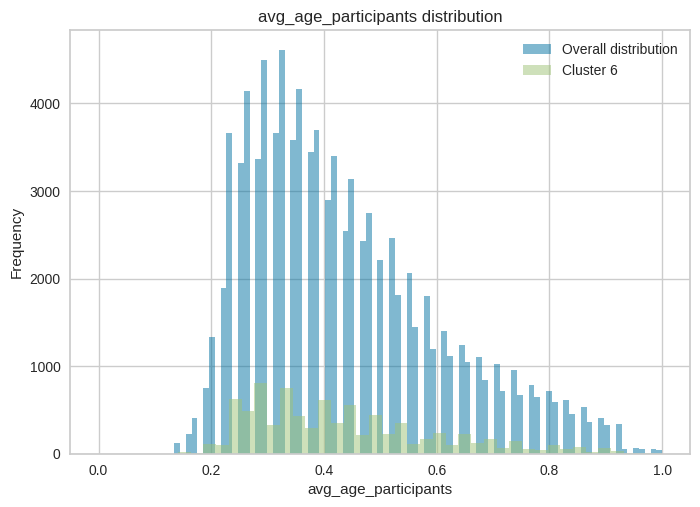

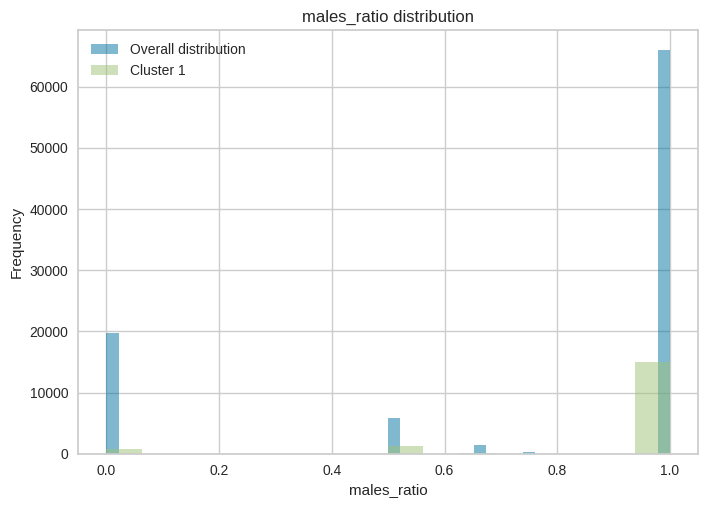

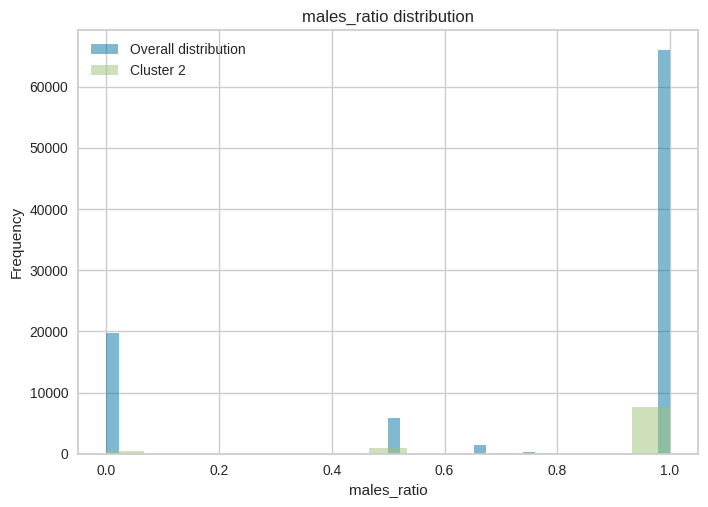

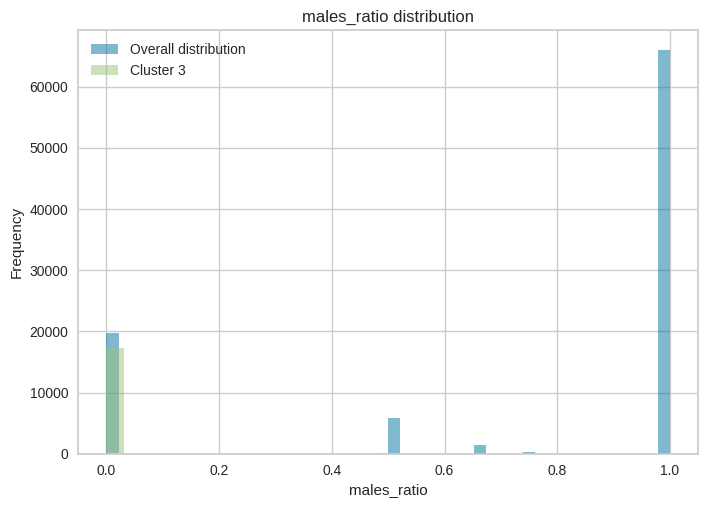

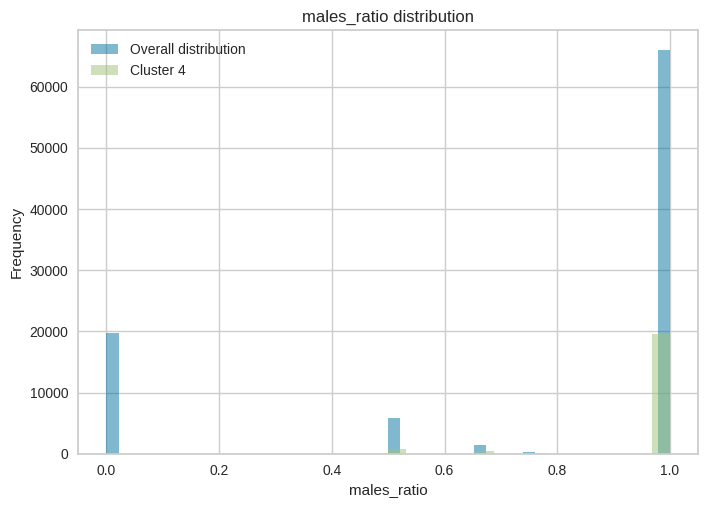

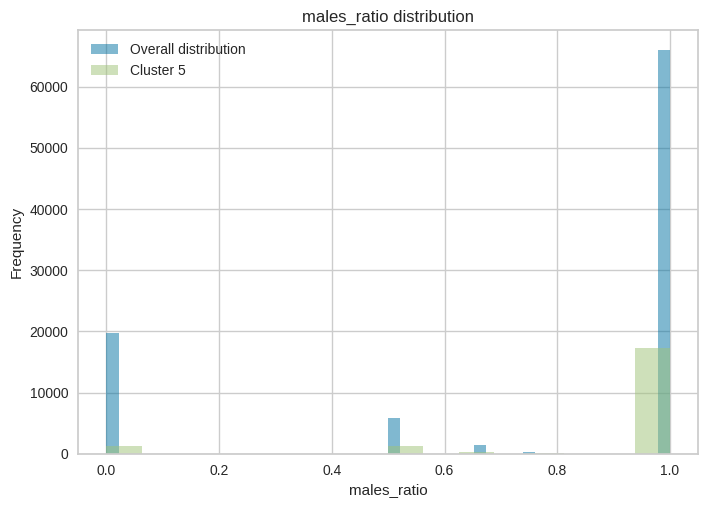

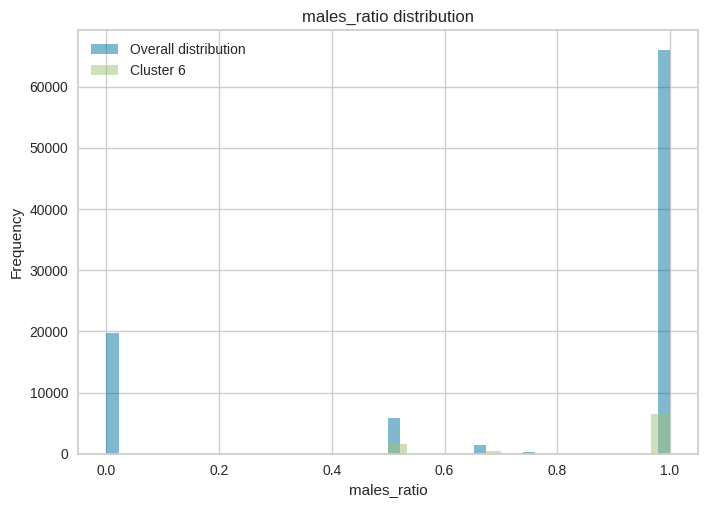

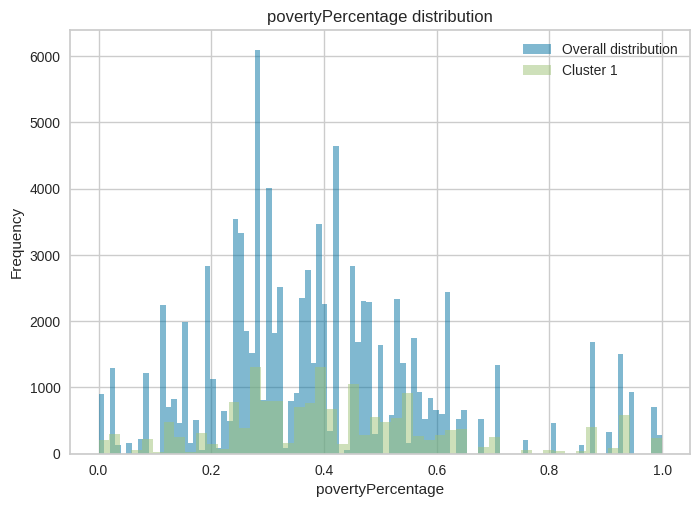

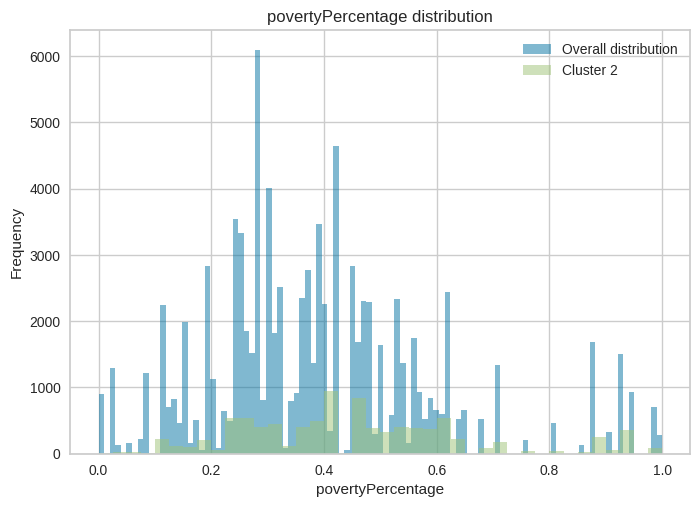

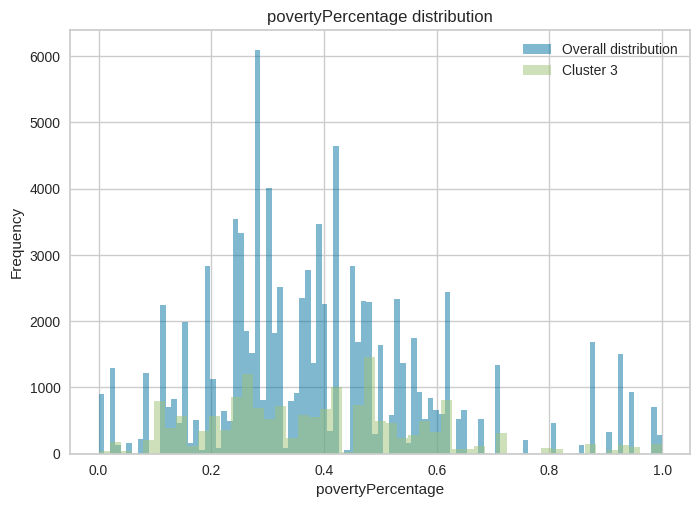

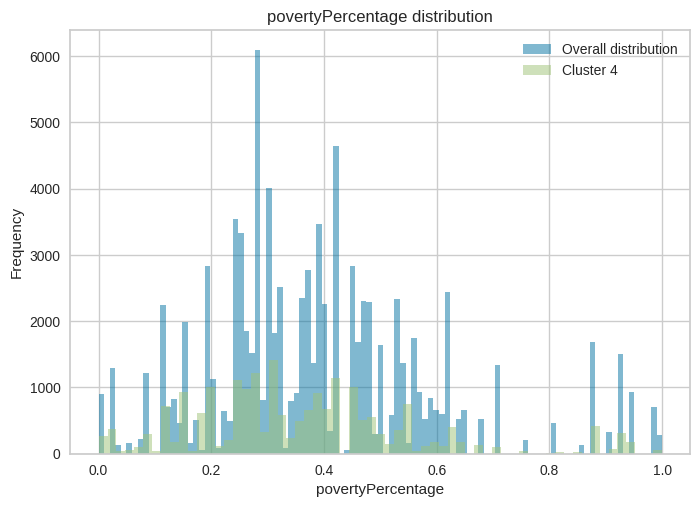

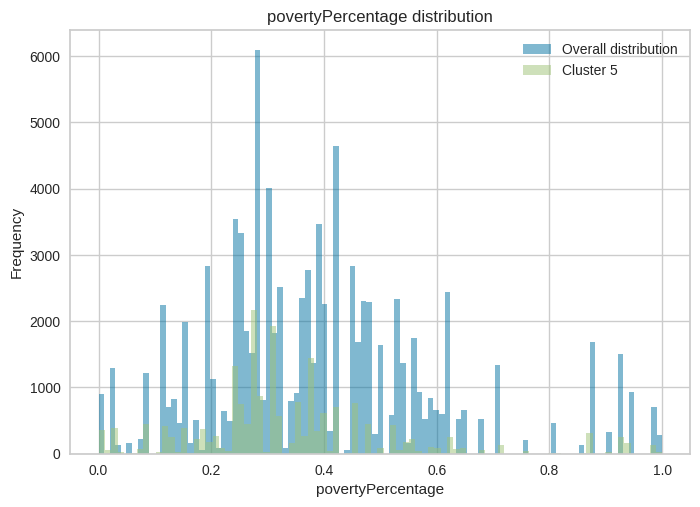

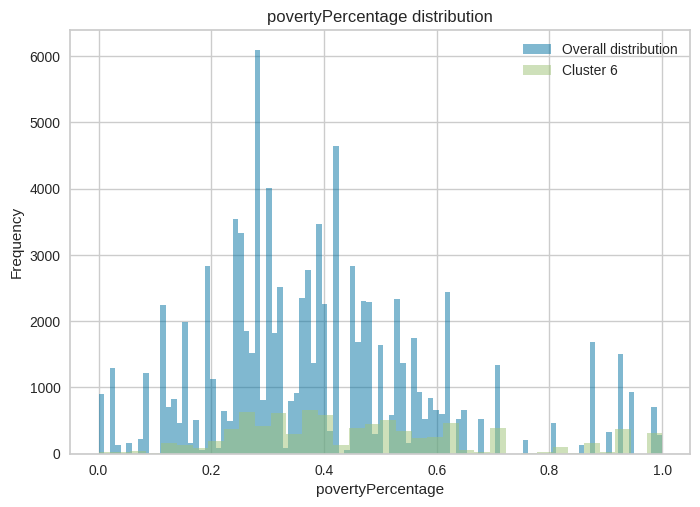

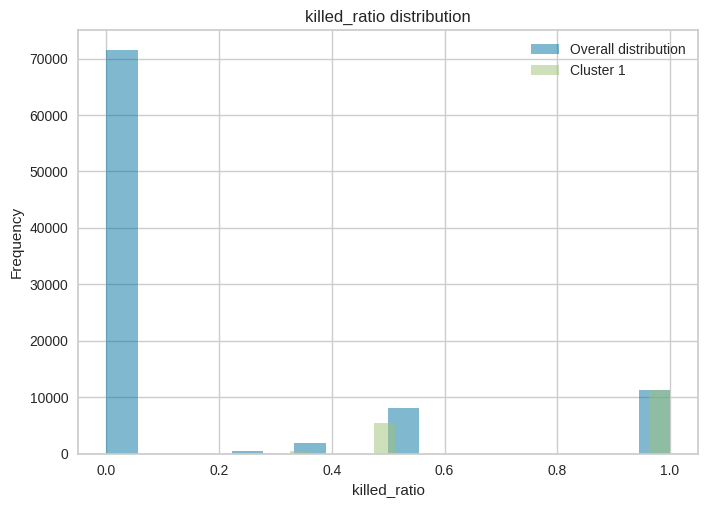

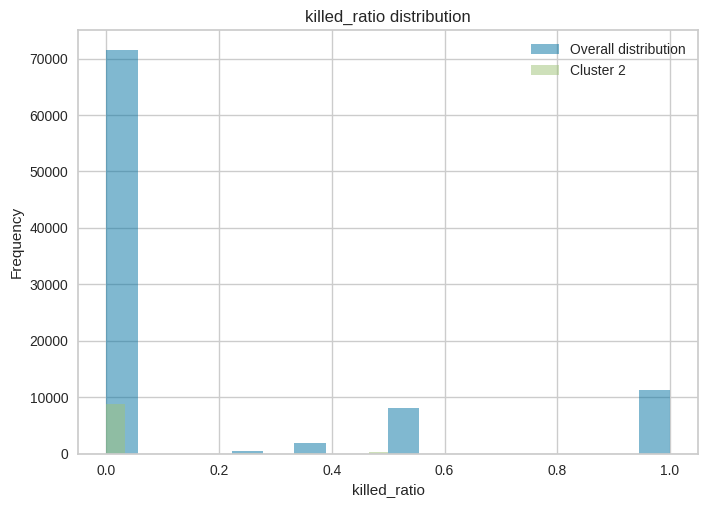

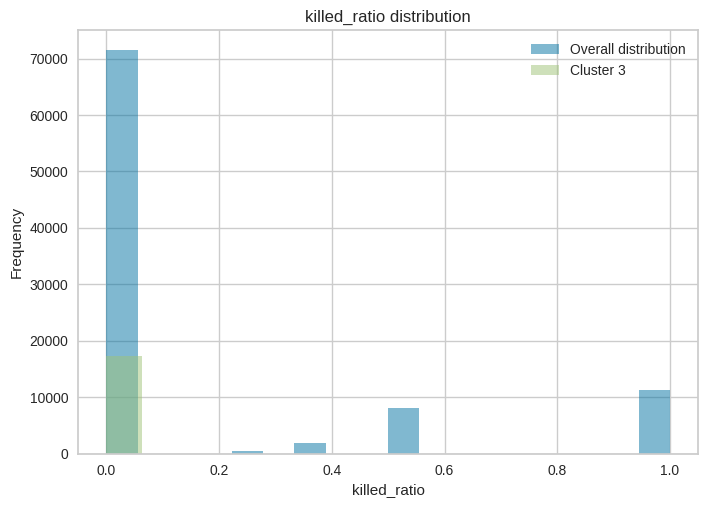

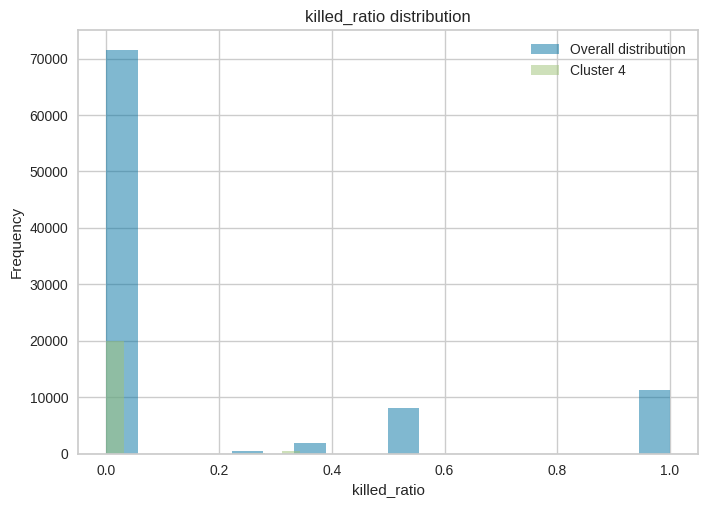

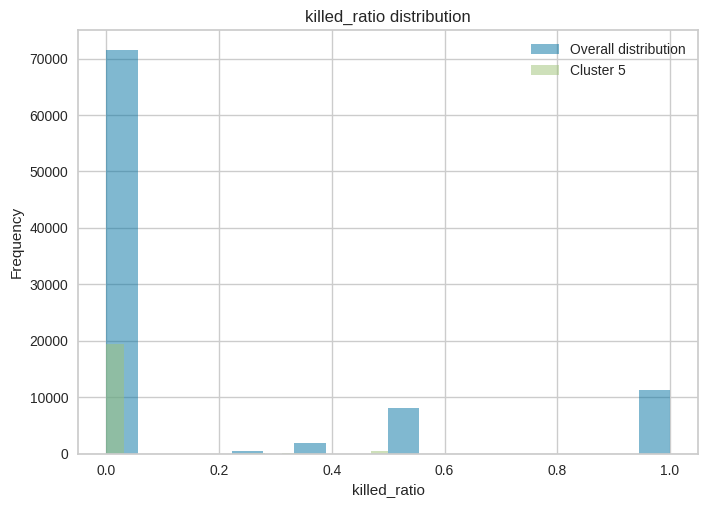

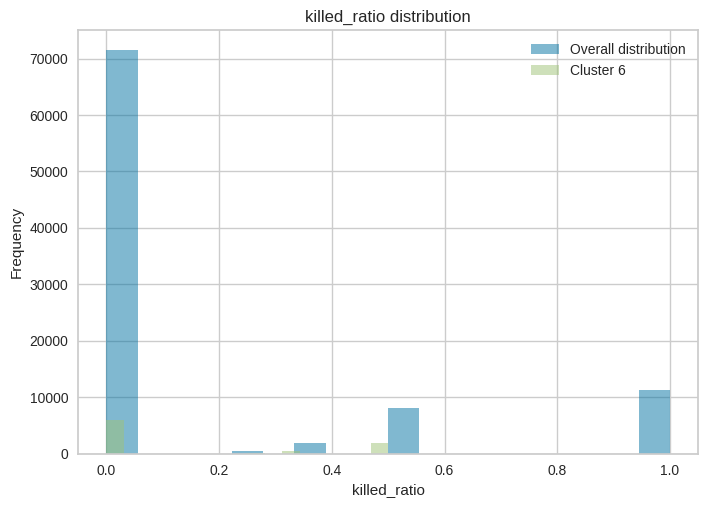

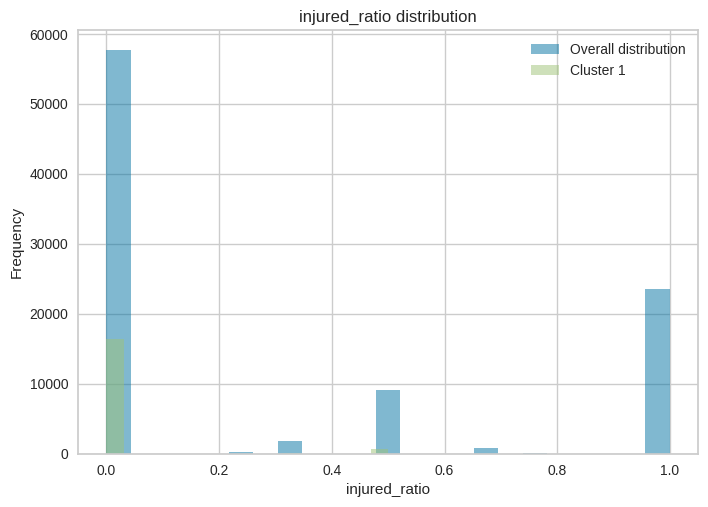

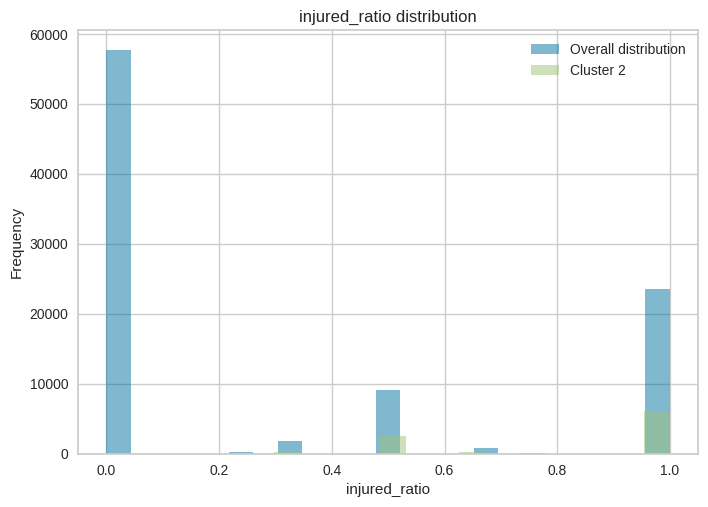

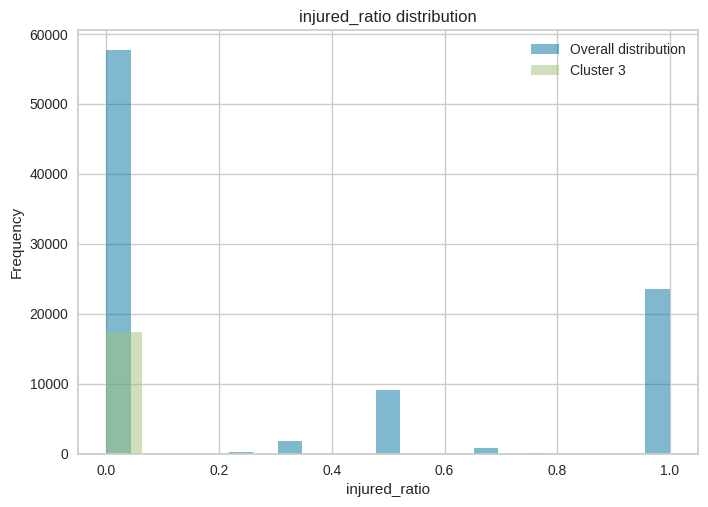

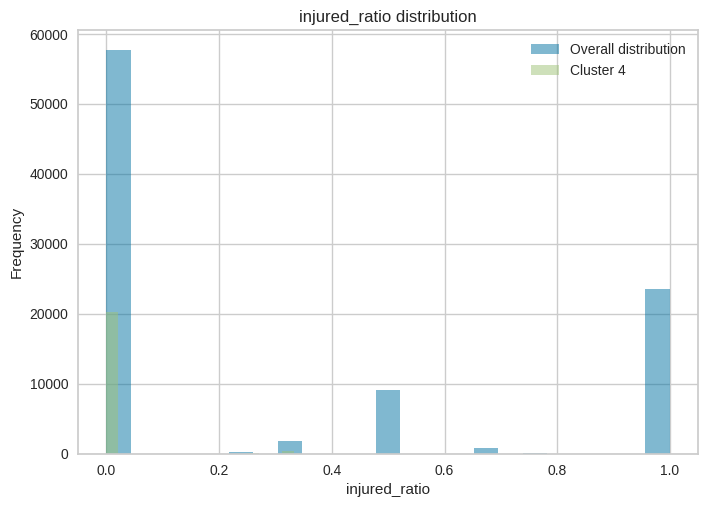

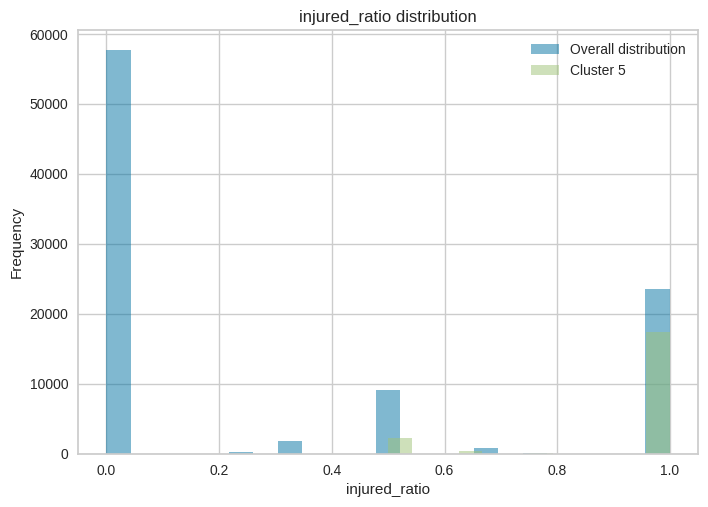

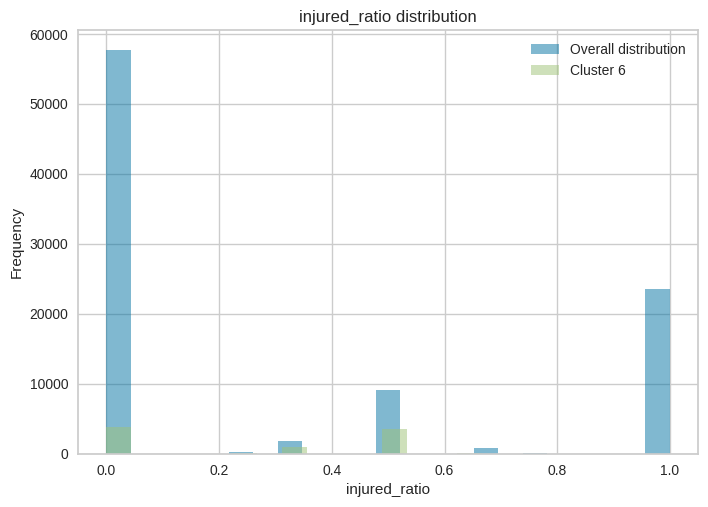

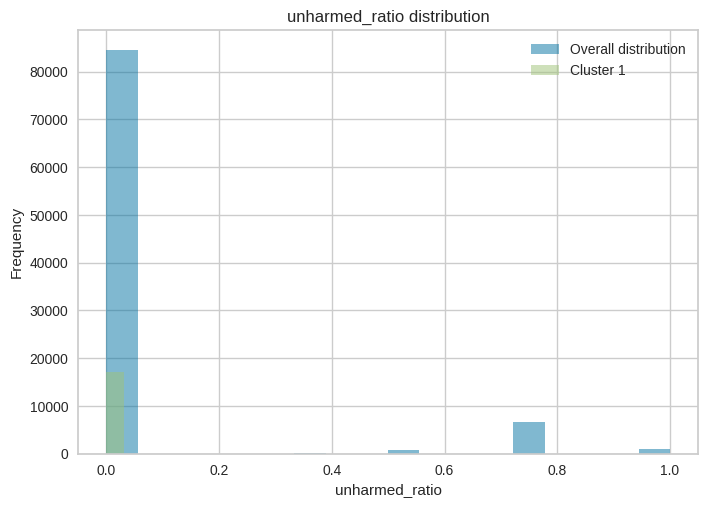

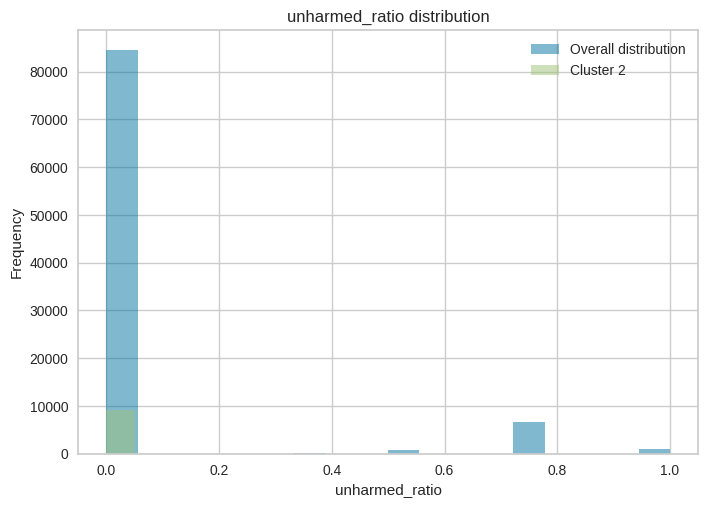

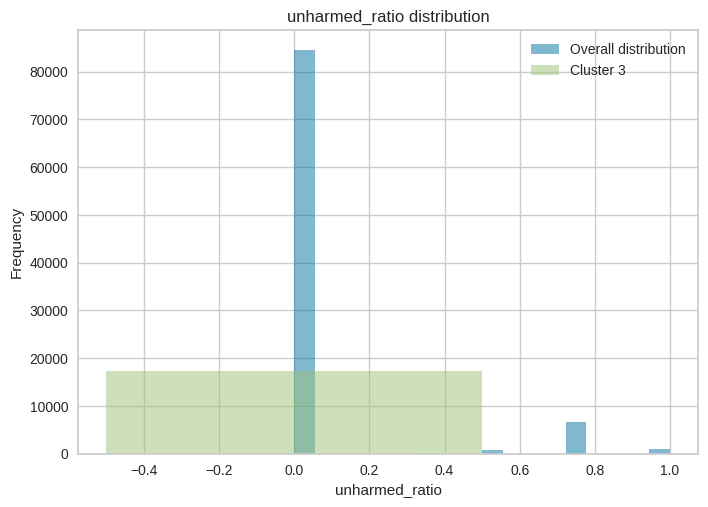

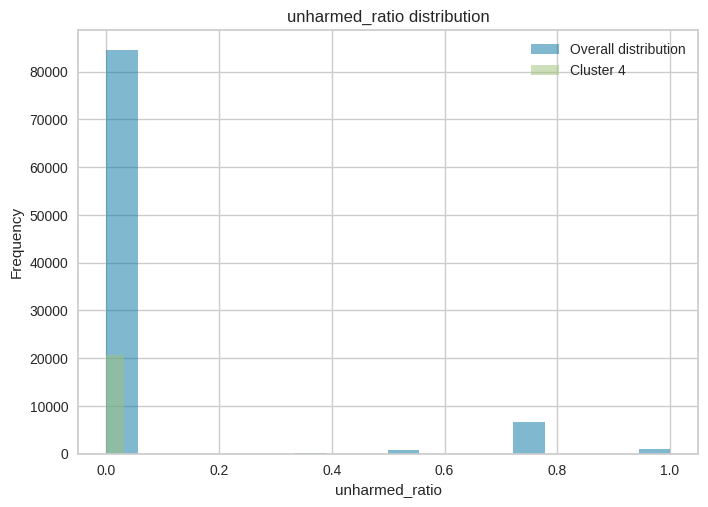

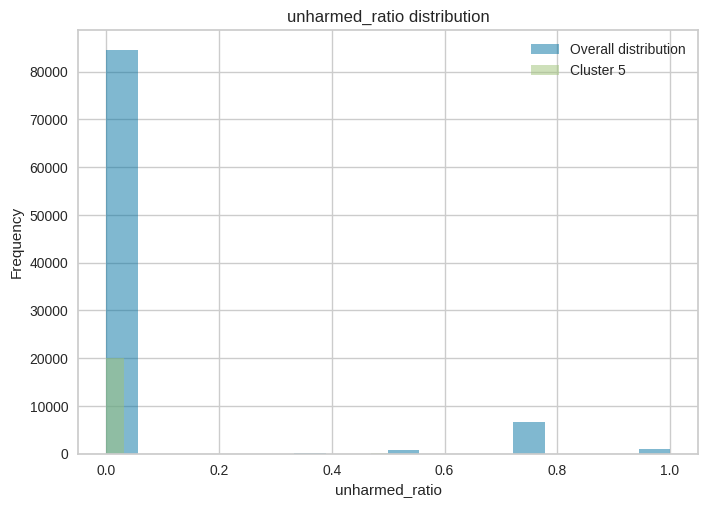

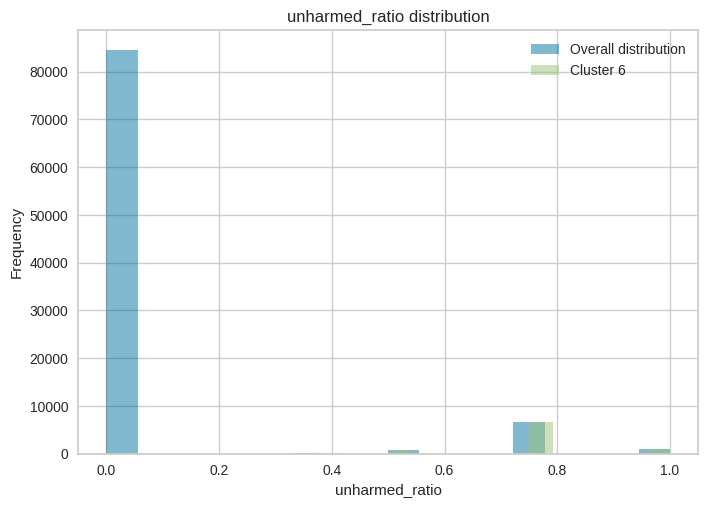

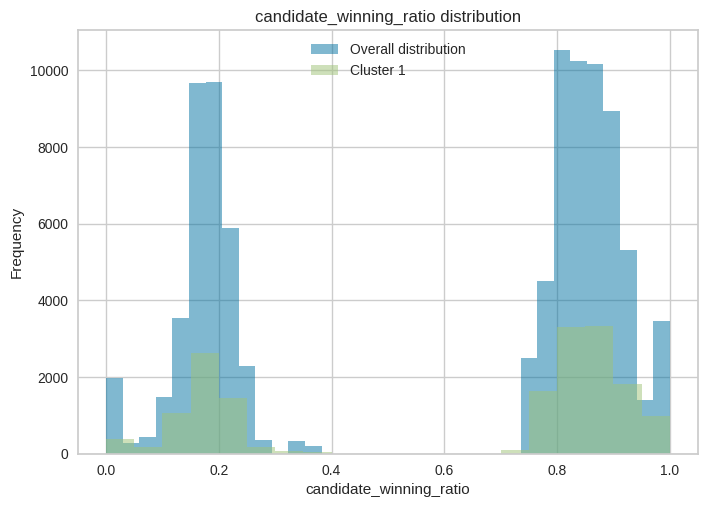

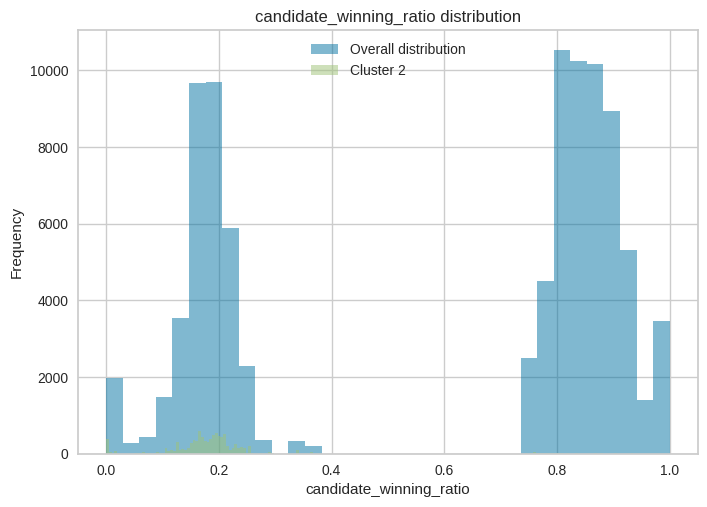

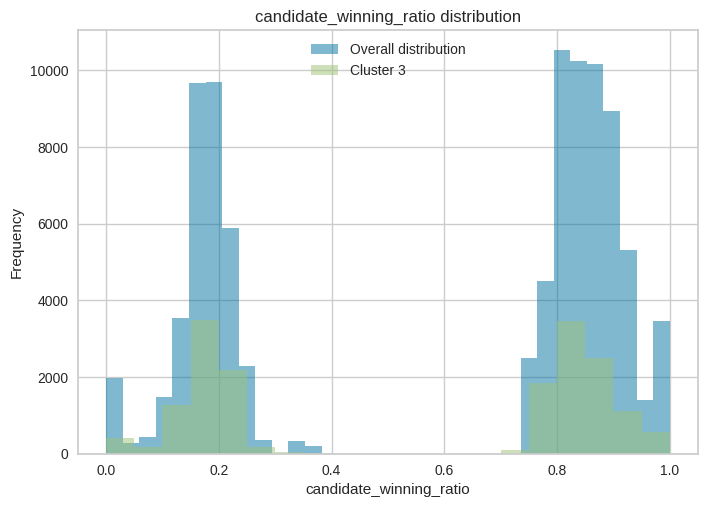

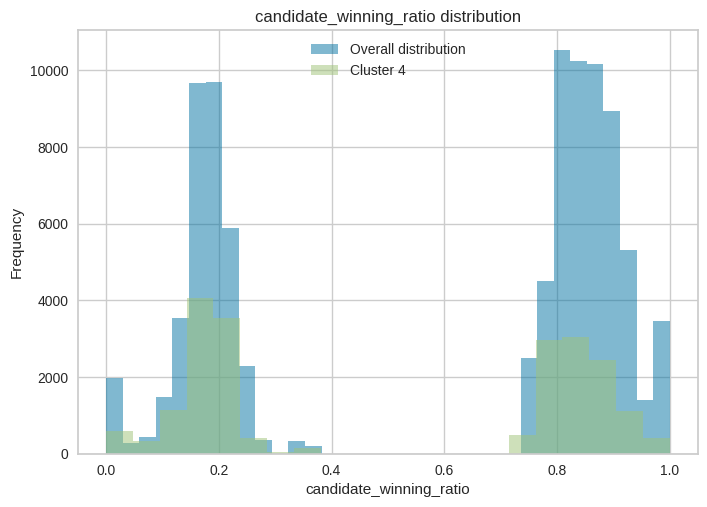

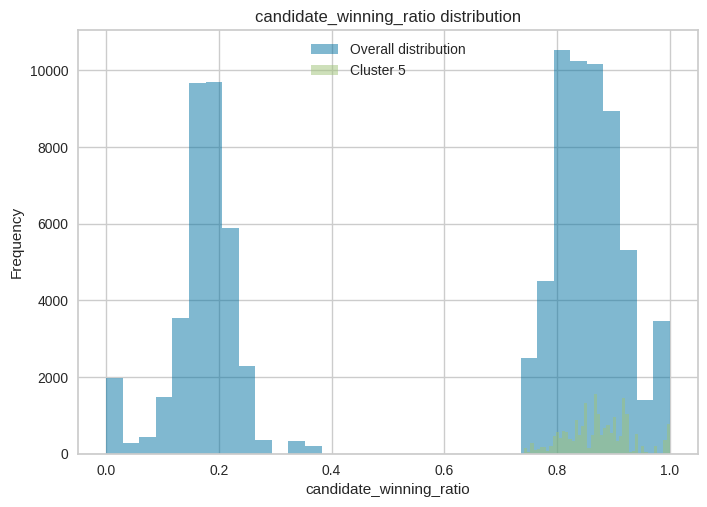

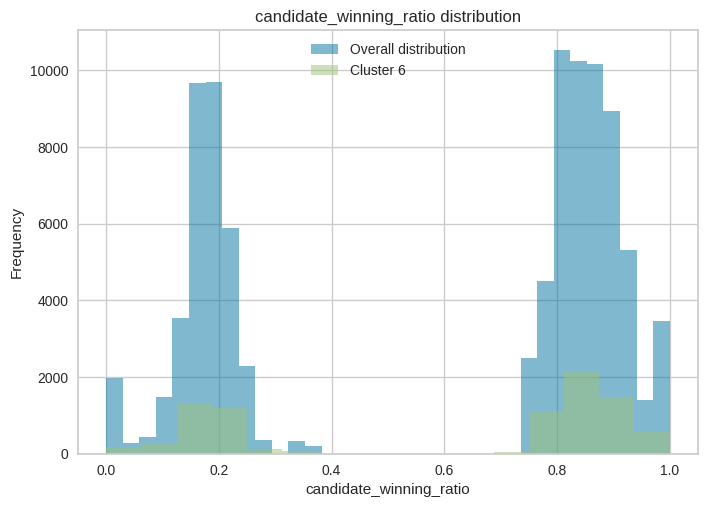

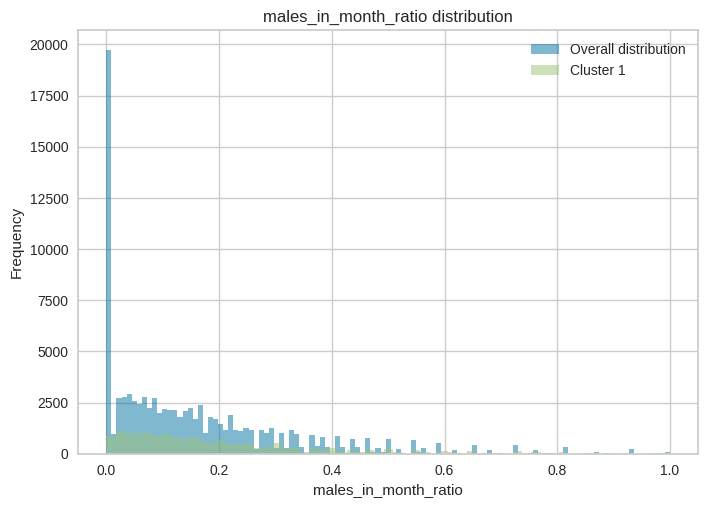

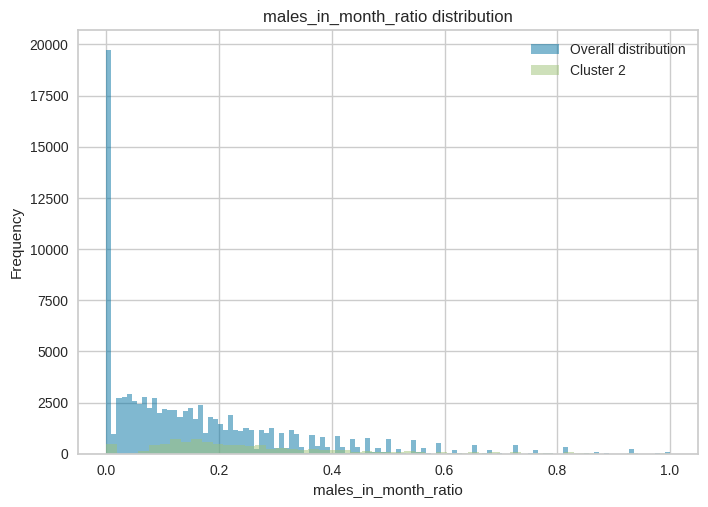

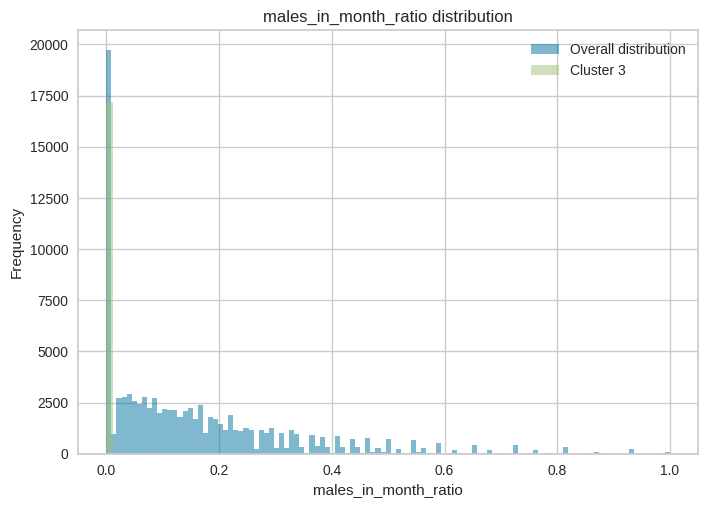

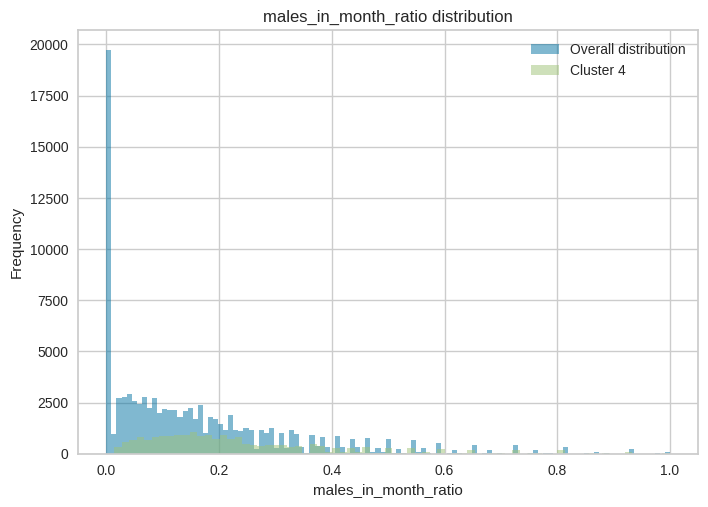

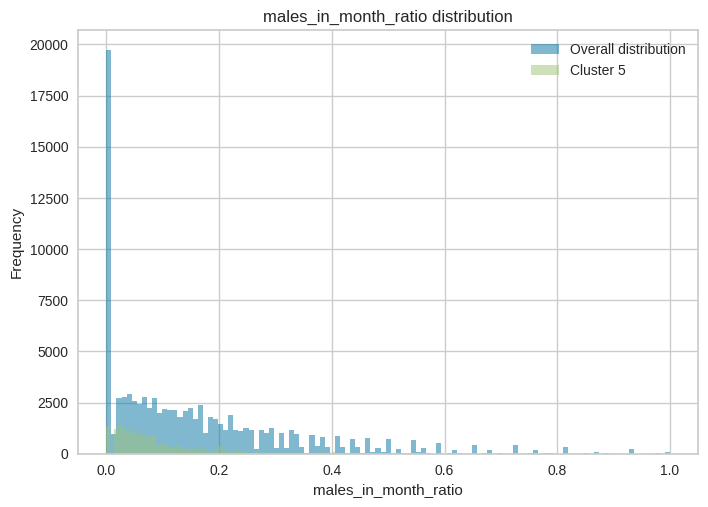

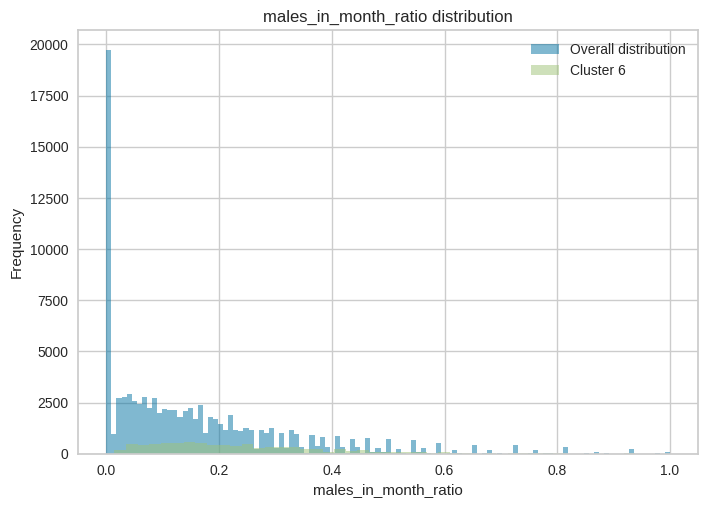

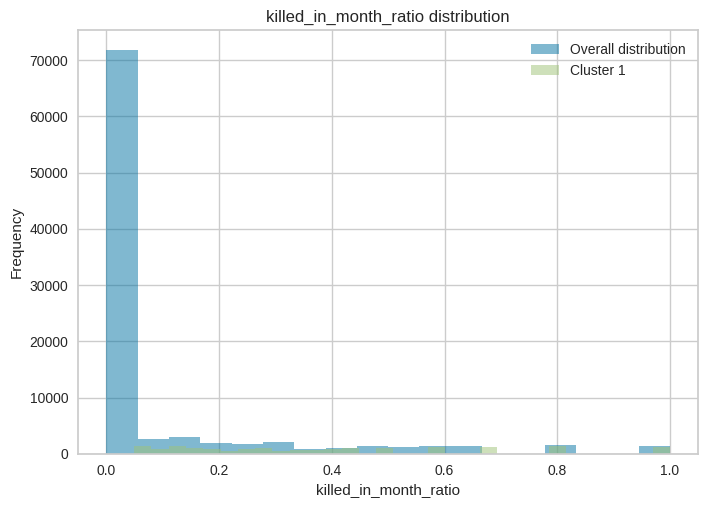

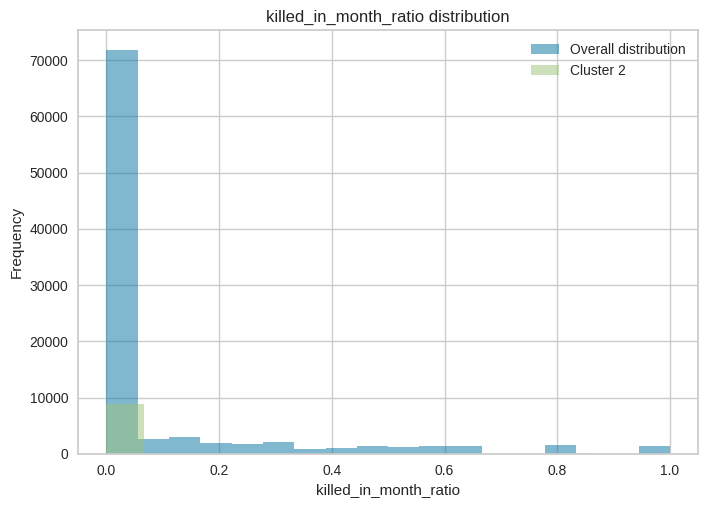

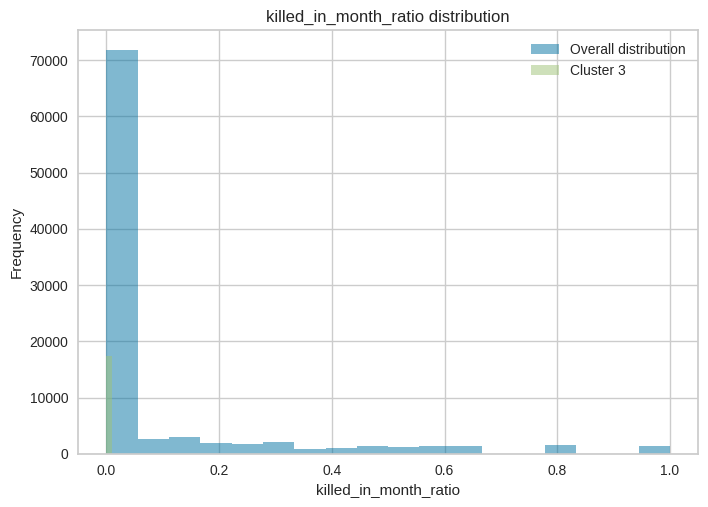

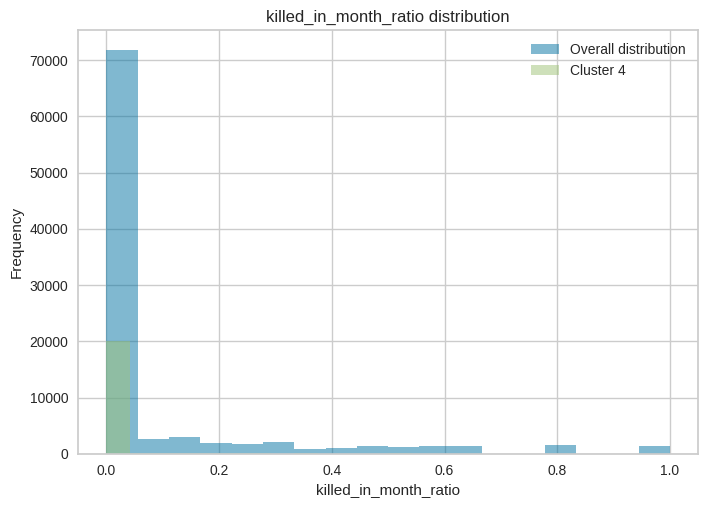

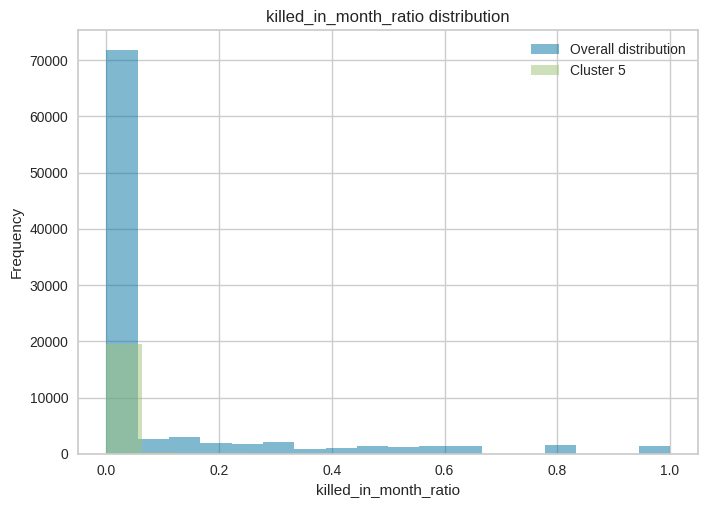

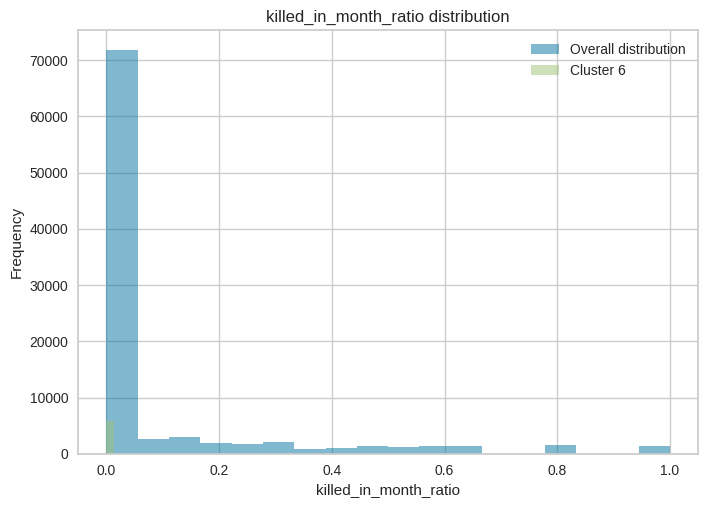

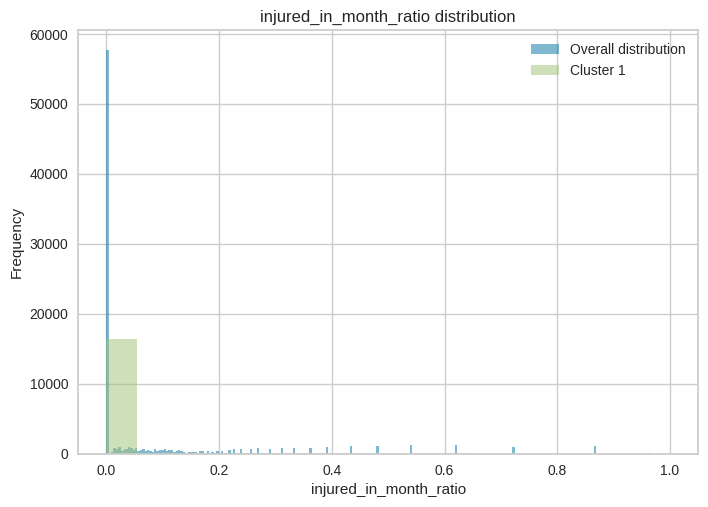

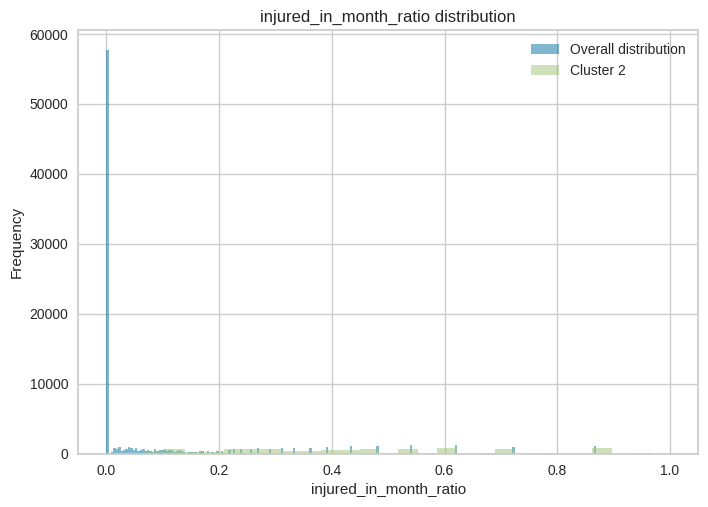

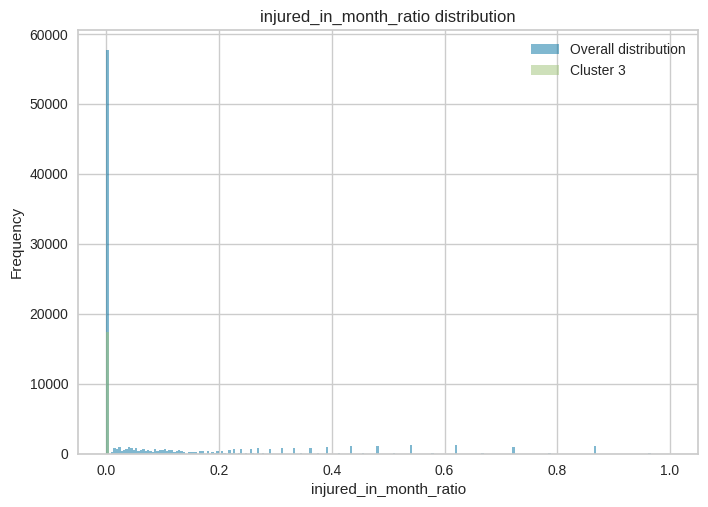

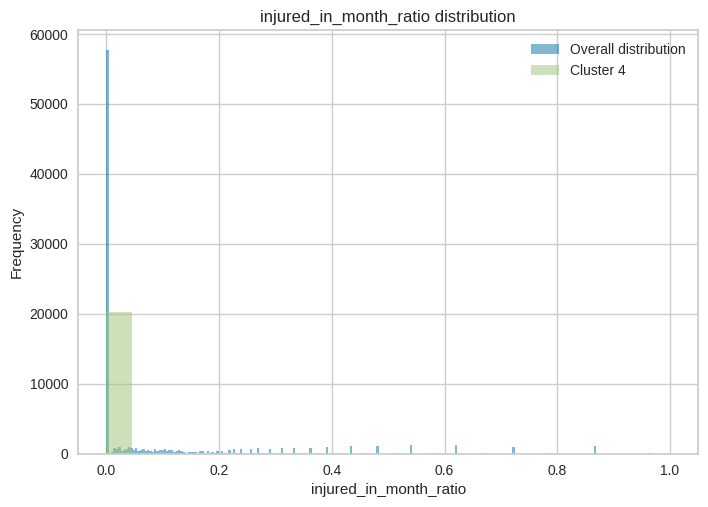

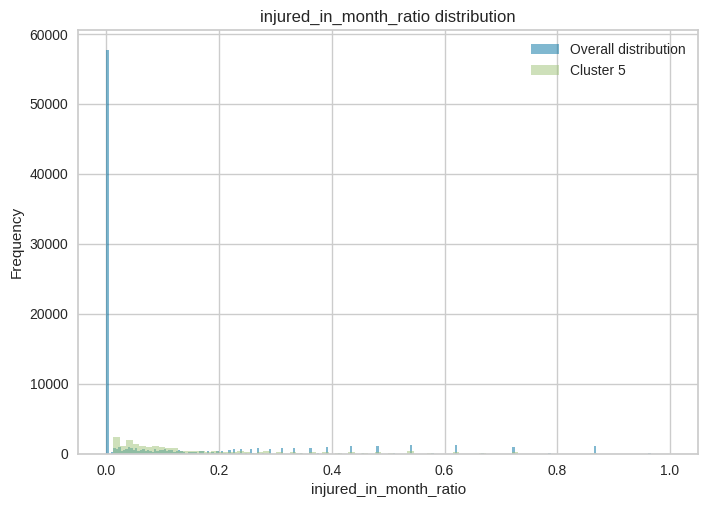

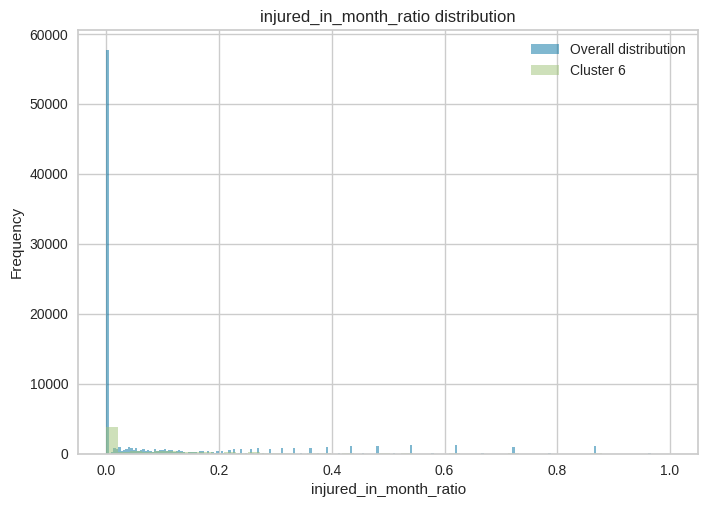

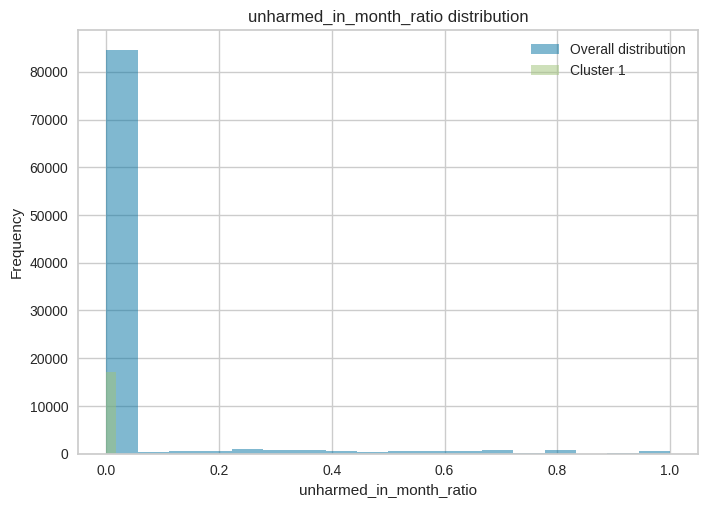

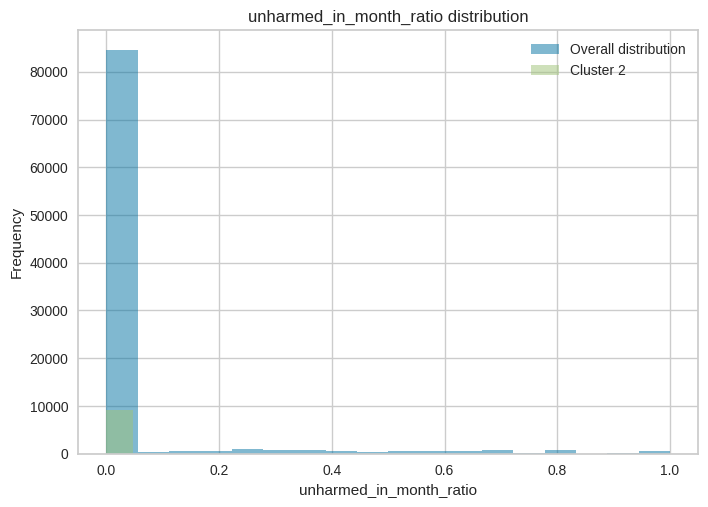

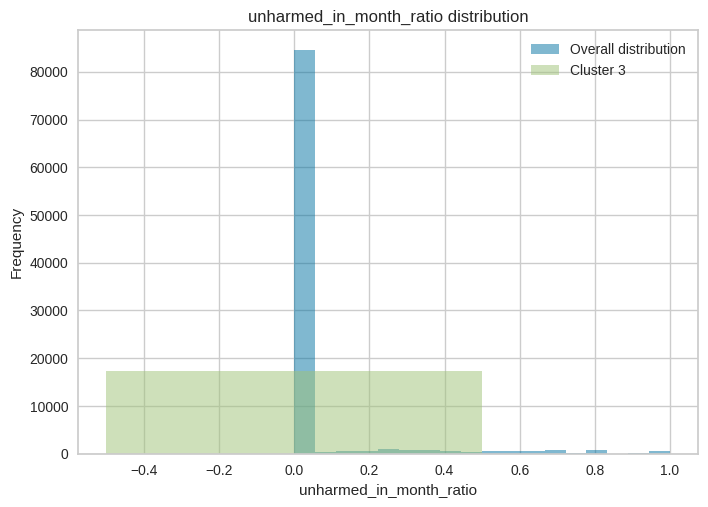

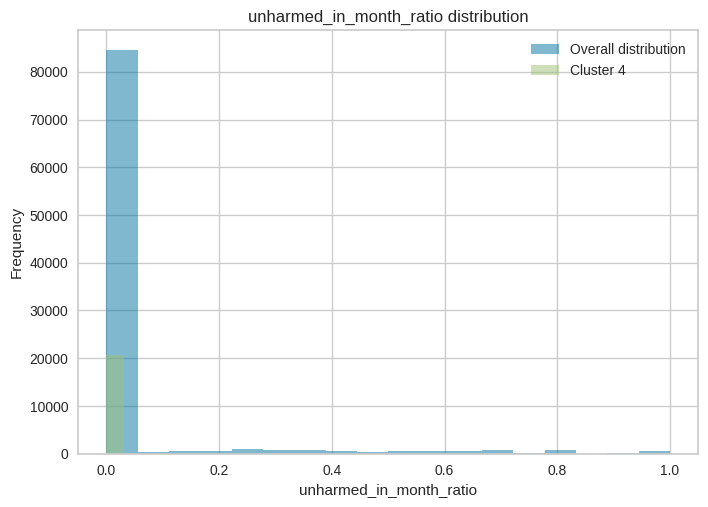

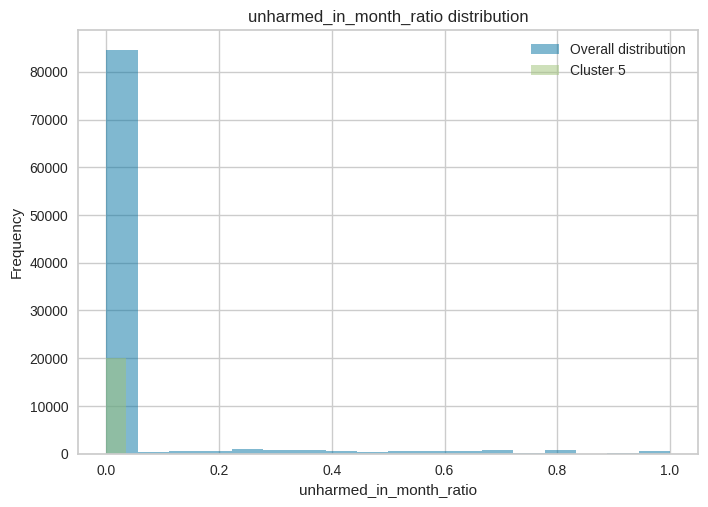

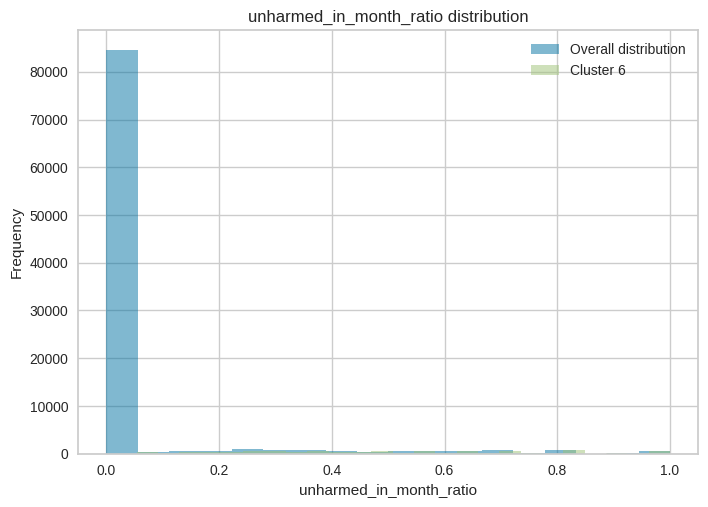

In [ ]:
# Perform K-means clustering with the optimal k value
k_optimal2 = 6
kmeans_6 = KMeans(n_clusters=k_optimal2)
kmeans_6.fit(X_normalized_minmax)
labels2 = kmeans_6.labels_

# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1)
    print(cluster_data.describe())

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    all_data = X_normalized_minmax[col]
    for k in range(k_optimal2):
        cluster_data = X_normalized_minmax[labels2 == k][col]
        plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
        plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
        plt.title(f'{col} distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


In [ ]:
# Calculate silhouette score
silhouette_score_val2 = silhouette_score(X_normalized_minmax, labels2)
print(f'Silhouette score: {silhouette_score_val2:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val2 = calinski_harabasz_score(X_normalized_minmax, labels2)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val2:.2f}')

Silhouette score: 0.33
Calinski-Harabasz score: 29287.08


In [ ]:
# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1, len(cluster_data))

Cluster 1 17136
Cluster 2 9266
Cluster 3 17350
Cluster 4 20768
Cluster 5 20126
Cluster 6 8514
